# High Value Customers Identification (Insiders) #
**By: Marx Cerqueira**

**Background of Problem Statement:**

All-in-One-Place company is a online retail store based in UK, and has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017).

Within just one year of operation, the marketing team realized that some customers buy more expensive products with high frequency and contribute to a significant portion of the company's revenue.

Due to this, the marketing team will launch a loyalty program for the best customers in the company's database, called High Value Customers. However, the team does not have advanced knowledge of data analysis to select program participants.

For this reason, the marketing team asked the data science team to select eligible customers for this loyalty program using advanced data manipulation and modeling techniques.

**Project Objective:**
Find significant customers for the business who make high purchases of their favourite products. The organization wants to roll out a loyalty program to the high-value customers after identification of segments. Use the clustering methodology to segment customers into groups.

## Project Solution Planning

### Input

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para integrar um programa de fidelização
2. Conjunto de dados
    - Vendas de um ecommerce, durante um período de um ano (nov 2015 to Dec 2017)

### Output


1. Indicação das pessoas que farão parte do programa de fidelização (insiders)
    - Lista: client_id > Is insider
             11321     > yes/1
             14332     > no/1
             
2. Relatório com as respostas das perguntas de negócio

    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível? O que são clientes de maior "valor"?
    - Faturamento: ** criação de features **
        - Alto Ticket Médio (média do valor gasto por cliente, quanto o cliente gasta na média com a empresa;
        - Alto LTV (Life Time Value);
        - Baixa Recência (tempo da última compra), queremos uma recência menor ou Alta Frequência (tempo entre as compras);
        - Alto basket size;
        - Baixa probabilidade de Churn;
        - Alta previsão de LTV;
        - Alta propensão de compra;
        
    - Custos:
        - Baixa taxa de devolução; A empresa tem um custo por devolução, normalmente essa taxa é definida no modelo de negócio da empresa (business plan);        
        
    - Experiência de compra:
        - Média alta das avaliações
    
2. **Quantos clientes farão parte do grupo?**
    - Número total de clientes
    - % do grupo Insiders
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever as características do cliente:
        - Idade
        - Localização 
        - em resumo é o look a like
    - Escrever características do consumo.
        - Atributos da clusterização;

4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Faturamento total do ano
    - Faturamento do grupo Insiders (verificar quantos % da receita total vem desse grupo)
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - LTV do grupo Insiders
    - Análise de Cohort
6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Definir a periodicidade do modelo (1 mes, 3 meses...)
    - O "desempenho" do cliente está próximo da média do cluster Insiders
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - Definir a periodicidade do modelo (1 mes, 3 meses...)
    - A pessoa precisa ser desimilar ou não-parecido com uma pessoa do grupo
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste A/B
    - Teste A/B Bayesiano
    - Teste de hipóteses.
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Desconto
    - Preferencia de compra
    - Frete
    - Visita a empresa, etc.

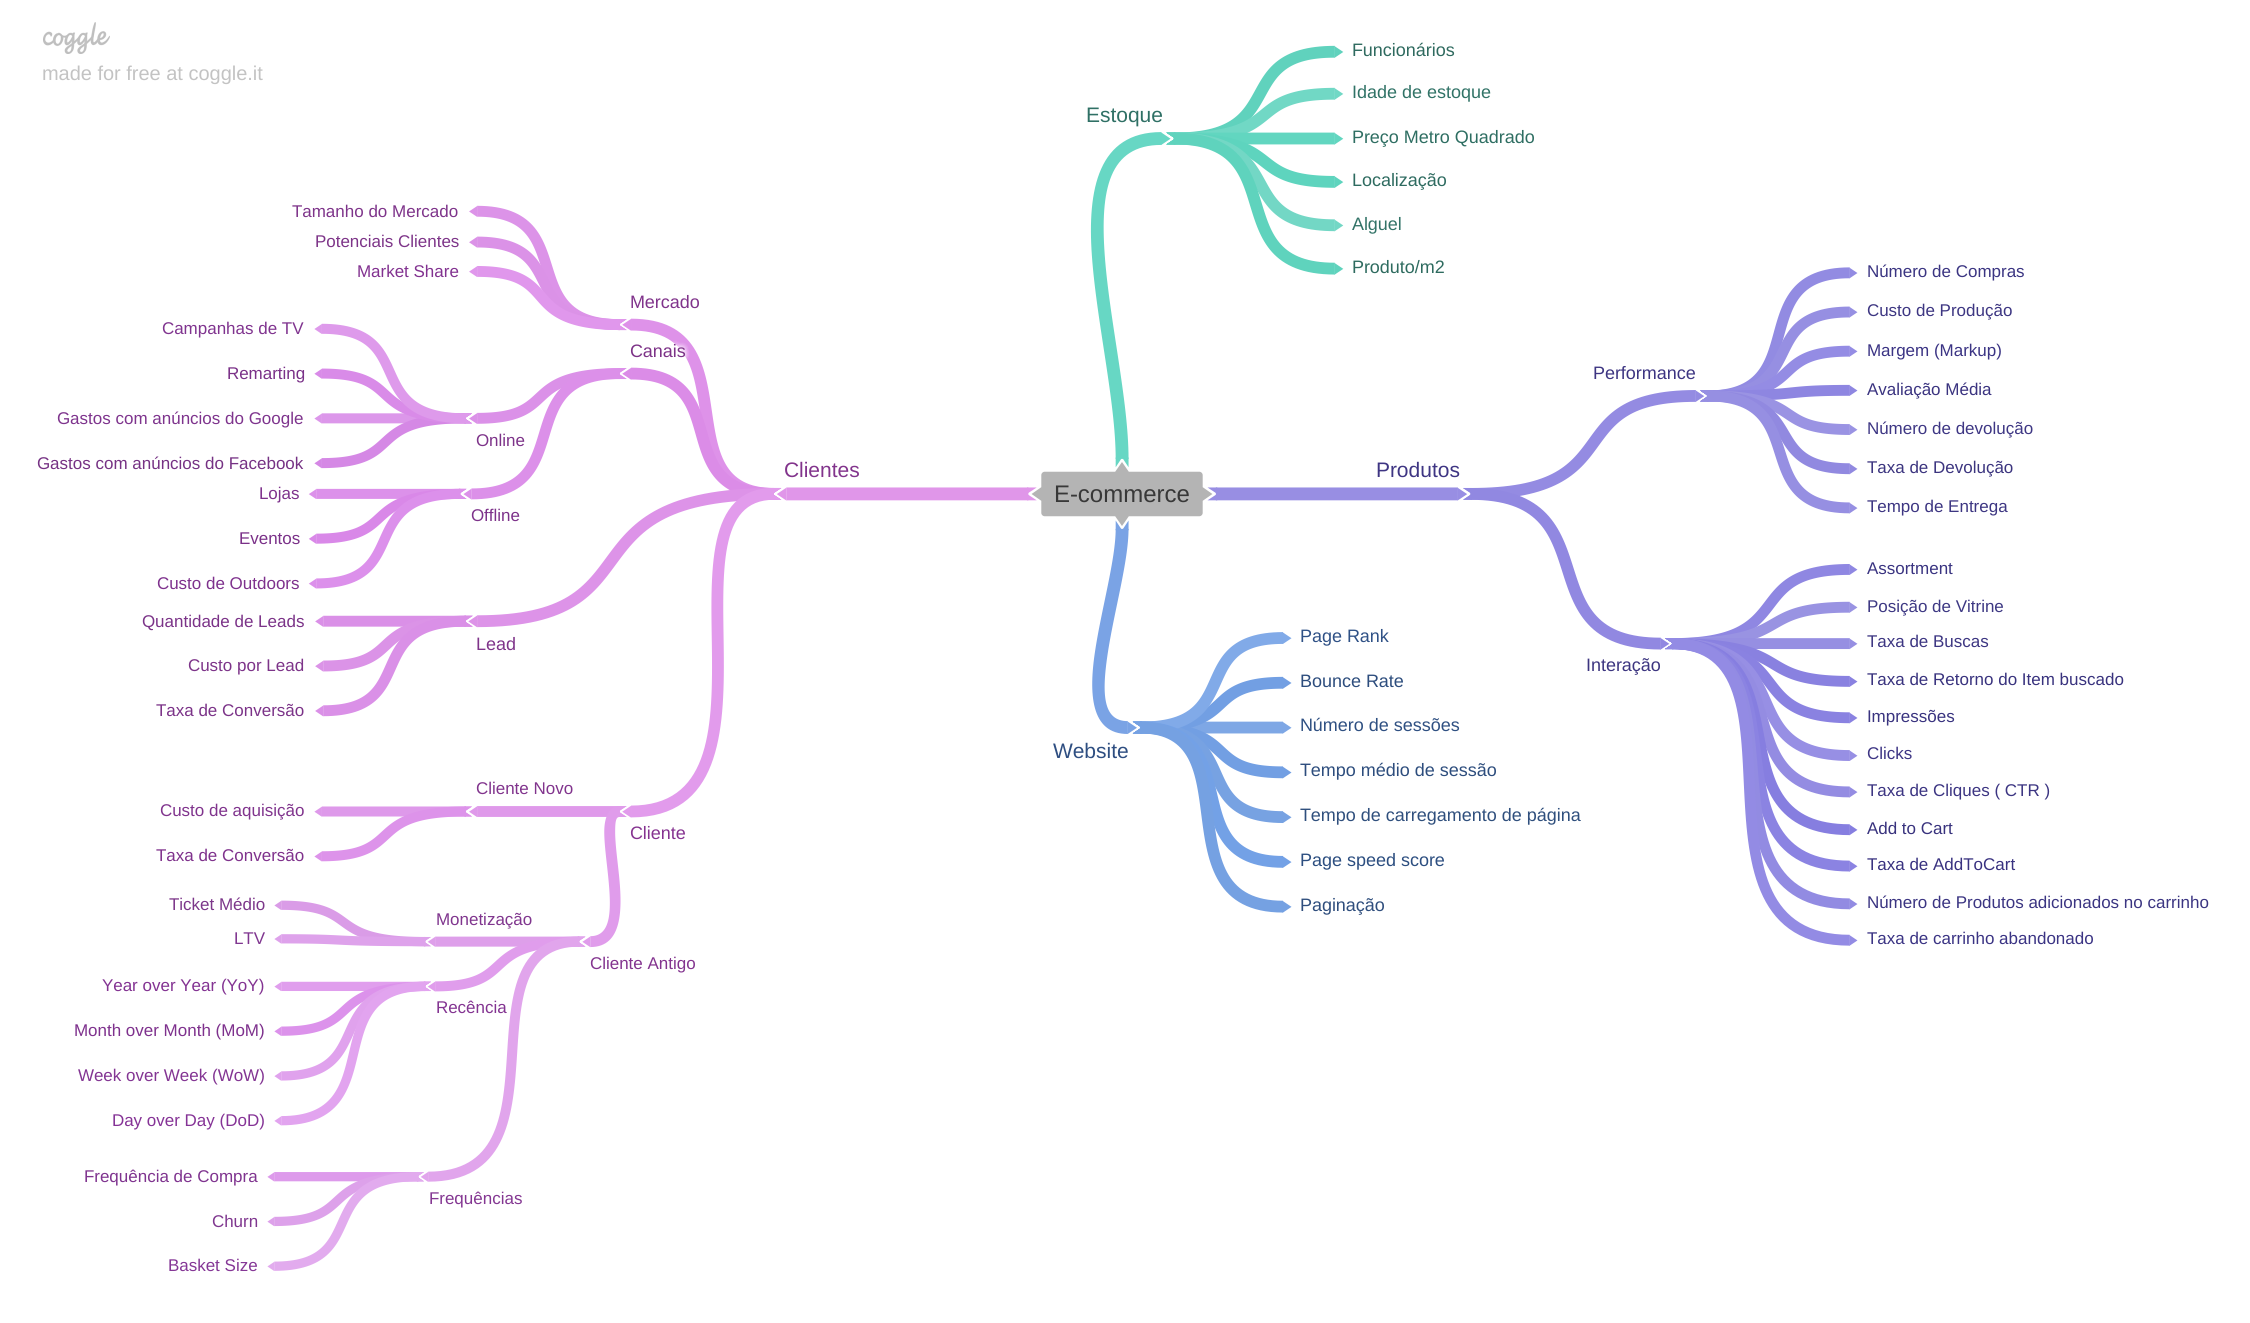

In [1]:
from IPython.display import Image
Image(filename='/home/marxcerqueira/repos/Kaggle-HighValue-Custormers-Identification/reports/figures/mapa_metricas_e_commerce.png')

## E-commerce Metrics

- **Growth Metrics**:
    1. Porcentagem do Marketshare
    2. Número de Clientes Novos
- **Revenue Metrics**:
    1. Número de Vendas
    2. Ticket Médio
    3. LTV ( Long Time Value )
    4. Recência Média
    5. Basket Size Médio
    6. Markup médio
- **Cost Metrics**:
    1. CAC ( Custo de aquisição de Clientes )
    2. Desconto médio
    3. Custo de Produção
    4. Taxa de devolução
    5. Custos Fixos ( Folha de pagamento, escritório, softwares )
    6. Impostos

## Benchmark de Soluções

Desk Research
1. Fazer pesquisas sobre o que as pessoas já fizeram, quais problemas de clusterização resolveram e como resolveram.
2. Leitura dos artigos
3. Resultado: 3 ou 4 soluções que você entendeu, e verificar o que da pra aproveitar para o nosso contexto.

# IMPORTS

In [1]:
import os
import inflection
import pickle
import sqlite3

import numpy   as np
import pandas  as pd
import seaborn as sns

import umap.umap_          as umap
import matplotlib.ticker   as mticker

from IPython.display import HTML
from IPython.display import Image
from matplotlib      import pyplot as plt

from pandas_profiling import ProfileReport

from sklearn import metrics       as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import ensemble      as en
from sklearn import manifold      as mn
from sklearn import mixture       as mx
from sklearn import cluster       as c

from scipy.cluster import hierarchy as hc
from plotly        import express   as px
from boruta        import BorutaPy

from sklearn.ensemble import RandomForestRegressor

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sqlalchemy import create_engine

## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [4]:
# load data
df_ecomm_raw = pd.read_csv('/home/marxcerqueira/repos/Kaggle-HighValue-Custormers-Identification/data/raw/Ecommerce.csv',
                           encoding='iso-8859-1',
                           low_memory=False)

# drop unnecessary columns
df_ecomm_raw = df_ecomm_raw.drop(columns = ['Unnamed: 8'], axis = 1)

In [5]:
df_ecomm_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# DATA DISCRIPTION

In [6]:
# Copy dataset
df0 = df_ecomm_raw.copy()

## Rename Columns

In [7]:
cols_old = ['InvoiceNo','StockCode','Description','Quantity', 'InvoiceDate','UnitPrice','CustomerID','Country']

snakecase = lambda x: inflection.underscore(x)
col_news = list(map(snakecase, cols_old))

# Rename columns
df0.columns = col_news

In [8]:
df0.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

Attribute Description:

    - InvoiceNo: Invoice number (A 6-digit integral number uniquely assigned to each transaction)
    - StockCode: Product (item) code
    - Description: Product (item) name
    - Quantity The quantities of each product (item) per transaction
    - InvoiceDate: The day when each transaction was generated
    - UnitPrice: Unit price (Product price per unit)
    - CustomerID: Customer number (Unique ID assigned to each customer)
    - Country: Country name (The name of the country where each customer resides)

## Data Dimension

In [9]:
print('Number of rows: {}.'.format(df0.shape[0]))
print('Number of cols: {}.'.format(df0.shape[1]))

Number of rows: 541909.
Number of cols: 8.


## Data Types

In [10]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Check NA Values

In [11]:
missing_count = df0.isnull().sum() # the count of missing values
value_count = df0.isnull().count() # the total values count

missing_percentage = round(missing_count/value_count*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'missing value count': missing_count, 'percentage': missing_percentage})
missing_df

,missing value count,percentage
invoice_no,0,0.00
stock_code,0,0.00
description,1454,0.27
quantity,0,0.00
invoice_date,0,0.00
unit_price,0,0.00
customer_id,135080,24.93
country,0,0.00


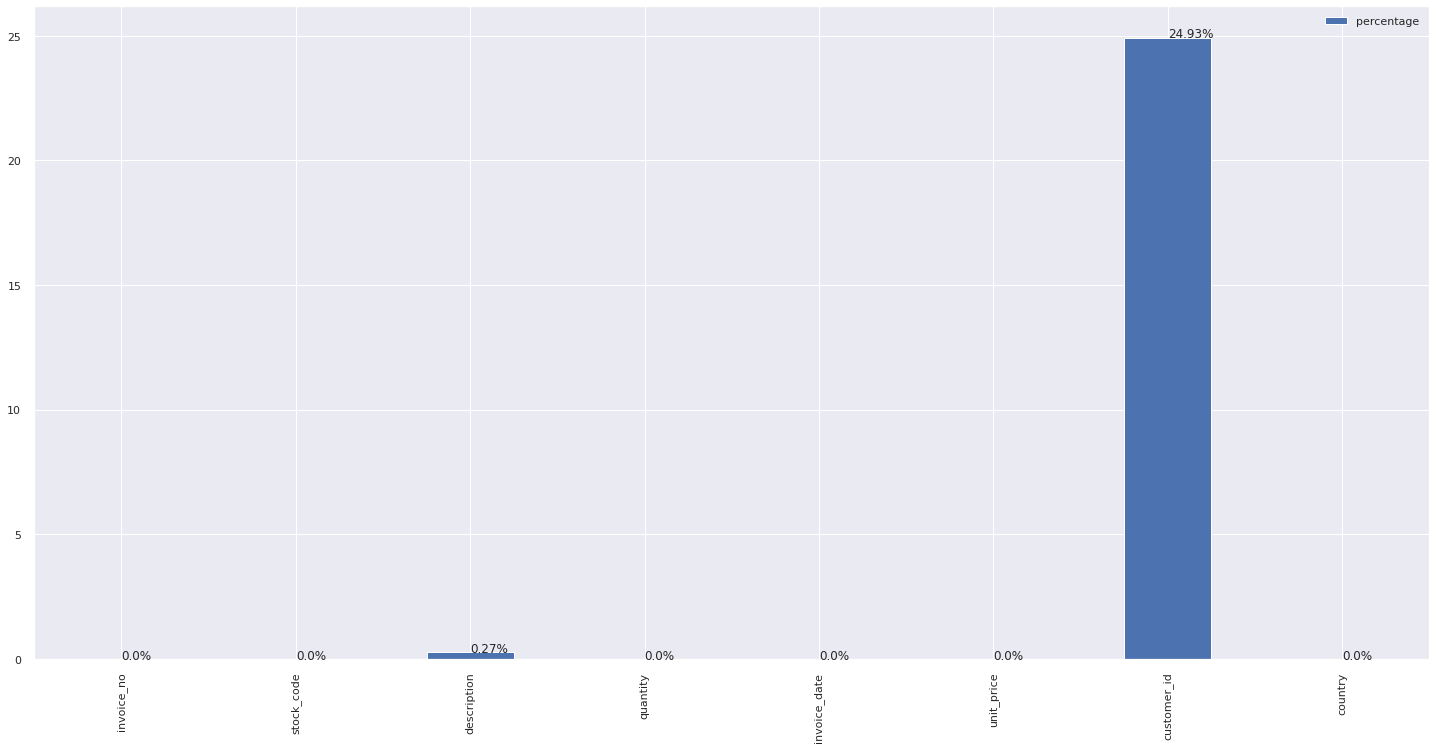

In [12]:
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate( missing_percentage ):
    barchart.text( index, percentage, str(percentage)+'%')

## Fillout NA

In [13]:
# separate NA's in two different dataframe, one with NAs and other without it
df_missing = df0.loc[df0['customer_id'].isna(), :]
df_not_missing = df0.loc[~df0['customer_id'].isna(), :]

In [14]:
df_missing.shape

(135080, 8)

In [15]:
df_not_missing.shape

(406829, 8)

In [16]:
## Fillout NA stratety, creating customers_id to keep their behavior (25% of the database)
df_not_missing['customer_id'].max()

18287.0

In [17]:
# create reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates().copy() )
df_backup['customer_id'] = np.arange( 19000, 19000+len( df_backup ), 1) # Fillout NA stratety: creating customers_id to keep their behavior (25% of the database)

# merge original with reference dataframe
df0 = pd.merge( df0, df_backup, on='invoice_no', how='left' )

# coalesce 
df0['customer_id'] = df0['customer_id_x'].combine_first( df0['customer_id_y'] )

# drop extra columns
df0 = df0.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [18]:
df0.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## Change Types

In [19]:
# Transforme datatype of variable invoice_date to datetime
df0['invoice_date'] = pd.to_datetime(df0['invoice_date'])

In [20]:
df0['customer_id'] = df0['customer_id'].astype('int64')

In [21]:
df0.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## Descriptive Statistics

In [22]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
unit_price,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
customer_id,541909.0,16688.840453,2911.411352,12346.00,14367.00,16249.00,18283.00,22709.0


In [23]:
df0.describe(include = object).T

,count,unique,top,freq
invoice_no,541909,25900,573585,1114
stock_code,541909,4070,85123A,2313
description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
country,541909,38,United Kingdom,495478


In [24]:
num_attributes = df0.select_dtypes(include = number)
cat_attributes = df0.select_dtypes(exclude = [number, np.datetime64])

### Numerical Attributes

In [25]:
# central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate

m1 = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana','std', 'skew','kurtosis']
m1

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


**Num Attributes Investigating**:

    1. Quantity negativa (could it be returned items?)
    2. Preço unitário igual a zero e negativo(could it be discount?)

### Categorical Attributes

In [26]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


#### Invoice_No

In [27]:
# problem: We got letters and numbers in invoice_no
#df0['invoice_no'].astype( int )

# identification: 
df_letter_invoices = df0.loc[df0['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]

print( 'Total number of invoices with letter on it: {}'.format( len( df_letter_invoices ) ) )
print( 'Total number of invoices with negative quantity: {}'.format( len( df_letter_invoices[ df_letter_invoices['quantity'] < 0 ] ) ) )

Total number of invoices with letter on it: 9291
Total number of invoices with negative quantity: 9288


#### Stock_Code

In [28]:
# check stock codes only characters
df0.loc[df0['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

# Acão:
## 1. Remove stock_code in ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK']

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

#### Description

In [29]:
df0.head()

# Action: Delete description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


#### Country

In [30]:
df0['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [31]:
# purchases per country (percentage)
df0['country'].value_counts( normalize=True)*100

United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United Arab Em

In [32]:
# customers per country
df0[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().reset_index().sort_values( 'customer_id', ascending=False)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


# VARIABLE FILTERING

In [33]:
df1 = df0.copy()

In [34]:
 # === Numerical attributes ====
df1 = df1.loc[df1['unit_price'] >= 0.04, :]

# === Categorical attributes ====
#stock code
df1 = df1[~df1['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
                                    'DCGSSGIRL', 'PADS', 'B', 'CRUK'] )]

# description
df1 = df1.drop( columns='description', axis=1 )

# country 
df1 = df1[~df1['country'].isin( ['European Community', 'Unspecified' ] ) ] #assuming this risk so we can use lat long parameters

# bad customers
df1 = df1[~df1['customer_id'].isin([16446, 12346, 15098])]

# quantity 
df1_returns = df1.loc[df1['quantity'] < 0, :].copy() # considering negative quantity is equal returned items
df1_purchases = df1.loc[df1['quantity'] >= 0, :].copy()

# FEATURE ENGINEERING

In [35]:
df2 = df1.copy()

## Feature Creation

In [36]:
df2.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850


In [37]:
# data reference
# RFM Model, creating feature for it

df_ref = df2.drop(['invoice_no', 'stock_code',
                   'quantity', 'invoice_date', 'unit_price',
                   'country'], axis = 1).drop_duplicates(ignore_index = True).copy()
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


### Gross Revenue

In [38]:
# Gross Revenue ( Faturamento ) quantity * price
df1_purchases.loc[:, 'gross_revenue'] = df1_purchases.loc[:,'quantity'] * df1_purchases.loc[:, 'unit_price']

# Monetary (How much money a customer spends on purchases)
df_monetary = df1_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### Recency

In [39]:
# Recency - Day from last purchase
df_recency = df1_purchases.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df1['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()

df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### Quantity of Purchases by Customer

In [40]:
# Qty of invoice no per customer
df_invoice_no = df1_purchases[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns = {'invoice_no': 'qty_invoice_no'})

df_ref = pd.merge(df_ref, df_invoice_no, on = 'customer_id', how = 'left')
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
dtype: int64

### Quantity of Items Purchased by Customer

In [41]:
# Quantity of items purchased by customer
df_freq = (df1_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qty_items'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
dtype: int64

### Qty Products  (different stock codes by customer)

In [42]:
# Quantity of unique products purchased (Frequency: qntd of products over time)

# Number of products (different stock codes by customer)
df_freq = (df1_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qty_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
qty_products      91
dtype: int64

### Average Ticket Value.

In [43]:
# Average Ticket Value
df_avg_ticket = df1_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
qty_products      91
avg_ticket        91
dtype: int64

### Average Recency Days

In [44]:
# # Average recency days
# df_aux = df1[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=['False', 'False'] )
# df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
# df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoince date

# df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

# df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# #average recency 
# df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# # merge
# df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
# df_ref.isna().sum()

### Frequency

In [45]:
#Frequency Purchase (rate: purchases by day)
df_aux = ( df1_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
qty_products      91
avg_ticket        91
frequency         91
dtype: int64

### Number of Returns

In [46]:
#Number of Returns
df_returns = df1_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qty_returns'} )
df_returns['qty_returns'] = df_returns['qty_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qty_returns'].isna(), 'qty_returns'] = 0 #customers with 0 returned items

df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
qty_products      91
avg_ticket        91
frequency         91
qty_returns        0
dtype: int64

### Basket Size

In [47]:
#Basket Size - the number of products sold in a single purchase ( Quantity )
# Invoice No = Purchase = purchase
# Stock Code = Produto Único = Product
# Quantity = Item = Item

df_aux = ( df1_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id         0
gross_revenue      91
recency_days       91
qty_invoice_no     91
qty_items          91
qty_products       91
avg_ticket         91
frequency          91
qty_returns         0
avg_basket_size    91
dtype: int64

### Unique Basket Size

In [48]:
#Unique Basket Size - Quantidade de produtos distintos por compra

df_aux = ( df1_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'stock_code', 'nunique' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id                0
gross_revenue             91
recency_days              91
qty_invoice_no            91
qty_items                 91
qty_products              91
avg_ticket                91
frequency                 91
qty_returns                0
avg_basket_size           91
avg_unique_basket_size    91
dtype: int64

In [49]:
 df_ref.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,0.073171,22.0,26.666667,0.333333


In [50]:
df_ref.shape

(5784, 11)

# EXPLORATORY DATA ANALYSIS (EDA)

    1) do analysis to validate business hypotheses, combat business guesswork

    2) study data space in which the data are inserted.

In [51]:
# drop NAs
df3 = df_ref.dropna().copy()
df3.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qty_invoice_no            0
qty_items                 0
qty_products              0
avg_ticket                0
frequency                 0
qty_returns               0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

In [52]:
# impact in the baseline dataframe 
df3.shape[0]/df_ref.shape[0]

0.9842669432918395

## Univariate Analysis

**Notes**
#O tipo de cluster vai variar de acordo com o problema de negócio;

What are we looking for in a clustering problem?

1. Cluesters coesos e separados;
2. Métricas que indicam variabilidade:
    - Min, max, range (dispersion)
    - Mean, median
    - Standard Deviation and Variance
    - Coefficient of variation (CV)

lets take a deep look in the outliers

In [53]:
# profile = ProfileReport( df3 )
# profile.to_file( 'output_v4.html' )

file:///home/marxcerqueira/repos/Kaggle-HighValue-Custormers-Identification/notebooks/output_v4.html

### Gross Revenue

In [74]:
df3[df3['gross_revenue']== 279138.02]

,customer_id,gross_revenue,recency_days,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,196844.0,2060.0,135.503893,0.20339,288.0,2733.944444,9.708333


In [103]:
df2[df2['customer_id'] == 14646].head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646
37957,539491,20751,1,2016-12-18,2.10,Netherlands,14646
37958,539491,21246,2,2016-12-18,4.95,Netherlands,14646
37959,539491,22960,1,2016-12-18,4.25,Netherlands,14646
37960,539491,22355,2,2016-12-18,0.85,Netherlands,14646
37961,539491,21123,2,2016-12-18,1.25,Netherlands,14646


In [68]:
 df3.sort_values( 'gross_revenue', ascending=False ).head(10)

,customer_id,gross_revenue,recency_days,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,196844.0,2060.0,135.503893,0.203390,288.0,2733.944444,9.708333
492,18102,259657.30,0.0,64124.0,431.0,602.453132,0.163043,0.0,1068.733333,2.500000
433,17450,194550.79,8.0,69993.0,337.0,577.302047,0.127778,952.0,1521.586957,2.695652
66,14911,140450.72,1.0,80263.0,5673.0,24.757751,0.533512,3332.0,403.331658,8.974874
1150,12415,124564.53,24.0,77373.0,713.0,174.704811,0.063694,427.0,3868.650000,22.150000
190,14156,117379.63,9.0,57885.0,1400.0,83.842593,0.151515,859.0,1052.454545,12.981818
15,17511,91062.38,2.0,64549.0,963.0,94.561142,0.083333,1535.0,2082.225806,14.612903
1381,12346,77183.60,325.0,74215.0,1.0,77183.600000,1.000000,74215.0,74215.000000,1.000000
12,16029,72882.09,38.0,40207.0,241.0,302.415311,0.184524,8004.0,648.500000,0.693548
955,16684,66653.56,4.0,50255.0,277.0,240.626570,0.078873,864.0,1794.821429,4.250000


In [71]:
df3[df3['customer_id'] == 14646].head(50)

,customer_id,gross_revenue,recency_days,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,196844.0,2060.0,135.503893,0.20339,288.0,2733.944444,9.708333


In [107]:
df2[df2['customer_id'] == 18102].head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
16425,537657,82484,408,2016-12-05,4.78,United Kingdom,18102
16426,537657,22830,30,2016-12-05,19.84,United Kingdom,18102
16427,537657,22189,972,2016-12-05,2.31,United Kingdom,18102
16428,537657,22188,972,2016-12-05,2.31,United Kingdom,18102
16429,537657,21623,408,2016-12-05,6.38,United Kingdom,18102
16430,537658,82484,48,2016-12-05,4.78,United Kingdom,18102
16431,537658,22189,36,2016-12-05,2.31,United Kingdom,18102
16432,537658,22188,36,2016-12-05,2.31,United Kingdom,18102
16433,537659,22765,23,2016-12-05,9.89,United Kingdom,18102
16434,537659,22507,208,2016-12-05,3.86,United Kingdom,18102


In [65]:
np.sum( df2.loc[df2['customer_id'] == 14646, 'quantity'] * df2.loc[df2['customer_id'] == 14646, 'unit_price'] )   

278778.02

In [66]:
 df2.loc[df2['customer_id'] == 14646, 'quantity'].sum()

196556

### Qty Products

In [67]:
df3[df3['qty_products']== 7838]

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
68,17841,40967.72,1.0,124.0,23053.0,7838.0,5.226808,0.33244,203.0,185.91129,10.66129


### Avg Ticket

In [68]:
df3[df3['avg_ticket']== 56157.5]

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size


In [69]:
df2[df2['customer_id'] == 16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


In [78]:
df3[df3['avg_ticket']== 77183.6]

,customer_id,gross_revenue,recency_days,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
1381,12346,77183.6,325.0,74215.0,1.0,77183.6,1.0,74215.0,74215.0,1.0


In [80]:
df2[df2['customer_id']== 12346]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
61619,541431,23166,74215,2017-01-16,1.04,United Kingdom,12346
61624,C541433,23166,-74215,2017-01-16,1.04,United Kingdom,12346


In [81]:
df3[df3['avg_ticket']== 13305.5]

,customer_id,gross_revenue,recency_days,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
3630,15098,39916.5,182.0,121.0,3.0,13305.5,3.0,60.0,40.333333,0.333333


In [82]:
df2[df2['customer_id']== 15098]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
222670,556442,22502,60,2017-06-08,4.95,United Kingdom,15098
222680,556444,22502,60,2017-06-08,649.50,United Kingdom,15098
222682,556446,22502,1,2017-06-08,649.50,United Kingdom,15098
222692,C556448,22502,-60,2017-06-08,4.95,United Kingdom,15098


In [119]:
df0[df0['stock_code'] == '22502'].sort_values('unit_price', ascending = False)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2017-06-08,649.50,United Kingdom,15098
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2017-06-08,649.50,United Kingdom,15098
222800,556459,22502,PICNIC BASKET WICKER SMALL,1,2017-06-08,10.79,United Kingdom,20904
227193,556825,22502,PICNIC BASKET WICKER SMALL,1,2017-06-13,10.79,United Kingdom,20925
227123,556821,22502,PICNIC BASKET WICKER SMALL,1,2017-06-13,10.79,United Kingdom,20922
226643,556812,22502,PICNIC BASKET WICKER SMALL,1,2017-06-12,10.79,United Kingdom,20920
224343,556516,22502,PICNIC BASKET WICKER SMALL,2,2017-06-11,10.79,United Kingdom,20909
224313,556515,22502,PICNIC BASKET WICKER SMALL,1,2017-06-11,10.79,United Kingdom,20908
224297,556513,22502,PICNIC BASKET WICKER SMALL,2,2017-06-11,10.79,United Kingdom,20906
170645,551339,22502,PICNIC BASKET WICKER SMALL,1,2017-04-25,10.79,United Kingdom,20437


In [83]:
df3[df3['avg_ticket']== 4453.43]

,customer_id,gross_revenue,recency_days,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
1262,15749,44534.3,235.0,18028.0,10.0,4453.43,0.030612,9014.0,6009.333333,1.666667


    action: remove these customers because they won't aggregate to explain the phenomeno
    customers to be removed:
        - 12346
        - 15098

### Qty of Returns

In [126]:
df3[df3['qty_returns'] == 4427]

,customer_id,gross_revenue,recency_days,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
970,12931,42055.96,21.0,28004.0,82.0,512.877561,0.04451,4427.0,1866.933333,1.866667


In [127]:
df2[df2['customer_id']== 12931]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
34302,539332,22197,200,2016-12-15,0.72,United Kingdom,12931
37355,539460,21731,20,2016-12-15,1.65,United Kingdom,12931
90281,543994,22604,256,2017-02-13,2.10,United Kingdom,12931
90282,543994,22149,280,2017-02-13,1.85,United Kingdom,12931
90283,543994,22197,600,2017-02-13,0.72,United Kingdom,12931
90284,543994,21731,144,2017-02-13,1.45,United Kingdom,12931
119634,546560,21172,50,2017-03-13,1.25,United Kingdom,12931
156136,550122,22604,192,2017-04-12,2.10,United Kingdom,12931
156137,550122,22149,240,2017-04-12,1.85,United Kingdom,12931
156138,550122,22197,600,2017-04-12,0.72,United Kingdom,12931


### Frequency

In [132]:
df3[df3['frequency']==17]

,customer_id,gross_revenue,recency_days,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,1733.0,297.0,18.152222,17.0,40.0,50.970588,0.617647


In [133]:
df2[df2['customer_id']==17850]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850
5,536365,22752,2,2016-11-29,7.65,United Kingdom,17850
6,536365,21730,6,2016-11-29,4.25,United Kingdom,17850
7,536366,22633,6,2016-11-29,1.85,United Kingdom,17850
8,536366,22632,6,2016-11-29,1.85,United Kingdom,17850
47,536372,22632,6,2016-11-29,1.85,United Kingdom,17850


### Avg Basket Size

In [140]:
df3[df3['avg_basket_size']==14149]

,customer_id,gross_revenue,recency_days,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
5368,22312,52940.94,32.0,14149.0,101.0,524.167723,1.0,0.0,14149.0,101.0


In [141]:
df2[df2['customer_id']== 22312]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
446951,574941,23582,147,2017-11-05,4.95,United Kingdom,22312
446952,574941,23581,314,2017-11-05,4.95,United Kingdom,22312
446953,574941,23570,384,2017-11-05,2.95,United Kingdom,22312
446954,574941,23571,370,2017-11-05,3.95,United Kingdom,22312
446955,574941,23551,64,2017-11-05,1.00,United Kingdom,22312
446956,574941,23536,1,2017-11-05,16.09,United Kingdom,22312
446957,574941,23535,11,2017-11-05,14.95,United Kingdom,22312
446958,574941,23534,6,2017-11-05,14.95,United Kingdom,22312
446959,574941,23526,8,2017-11-05,14.95,United Kingdom,22312
446960,574941,23510,92,2017-11-05,1.00,United Kingdom,22312


    outlier impacta várias features, por isso o efeito dele sobre os modelos pode ser bem ruim
    outlier pode ser parte do fenomeno, ou problema que devemos resolver (impute manual errado, etc) e devemos remover

## Bivariate Analysis

- analyze a feature in relation to all others

In [54]:
df3.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,0.073171,22.0,26.666667,0.333333


In [55]:
cols = ['customer_id']
df32 = df3.drop(cols, axis = 1).copy()

<Figure size 1800x864 with 0 Axes>

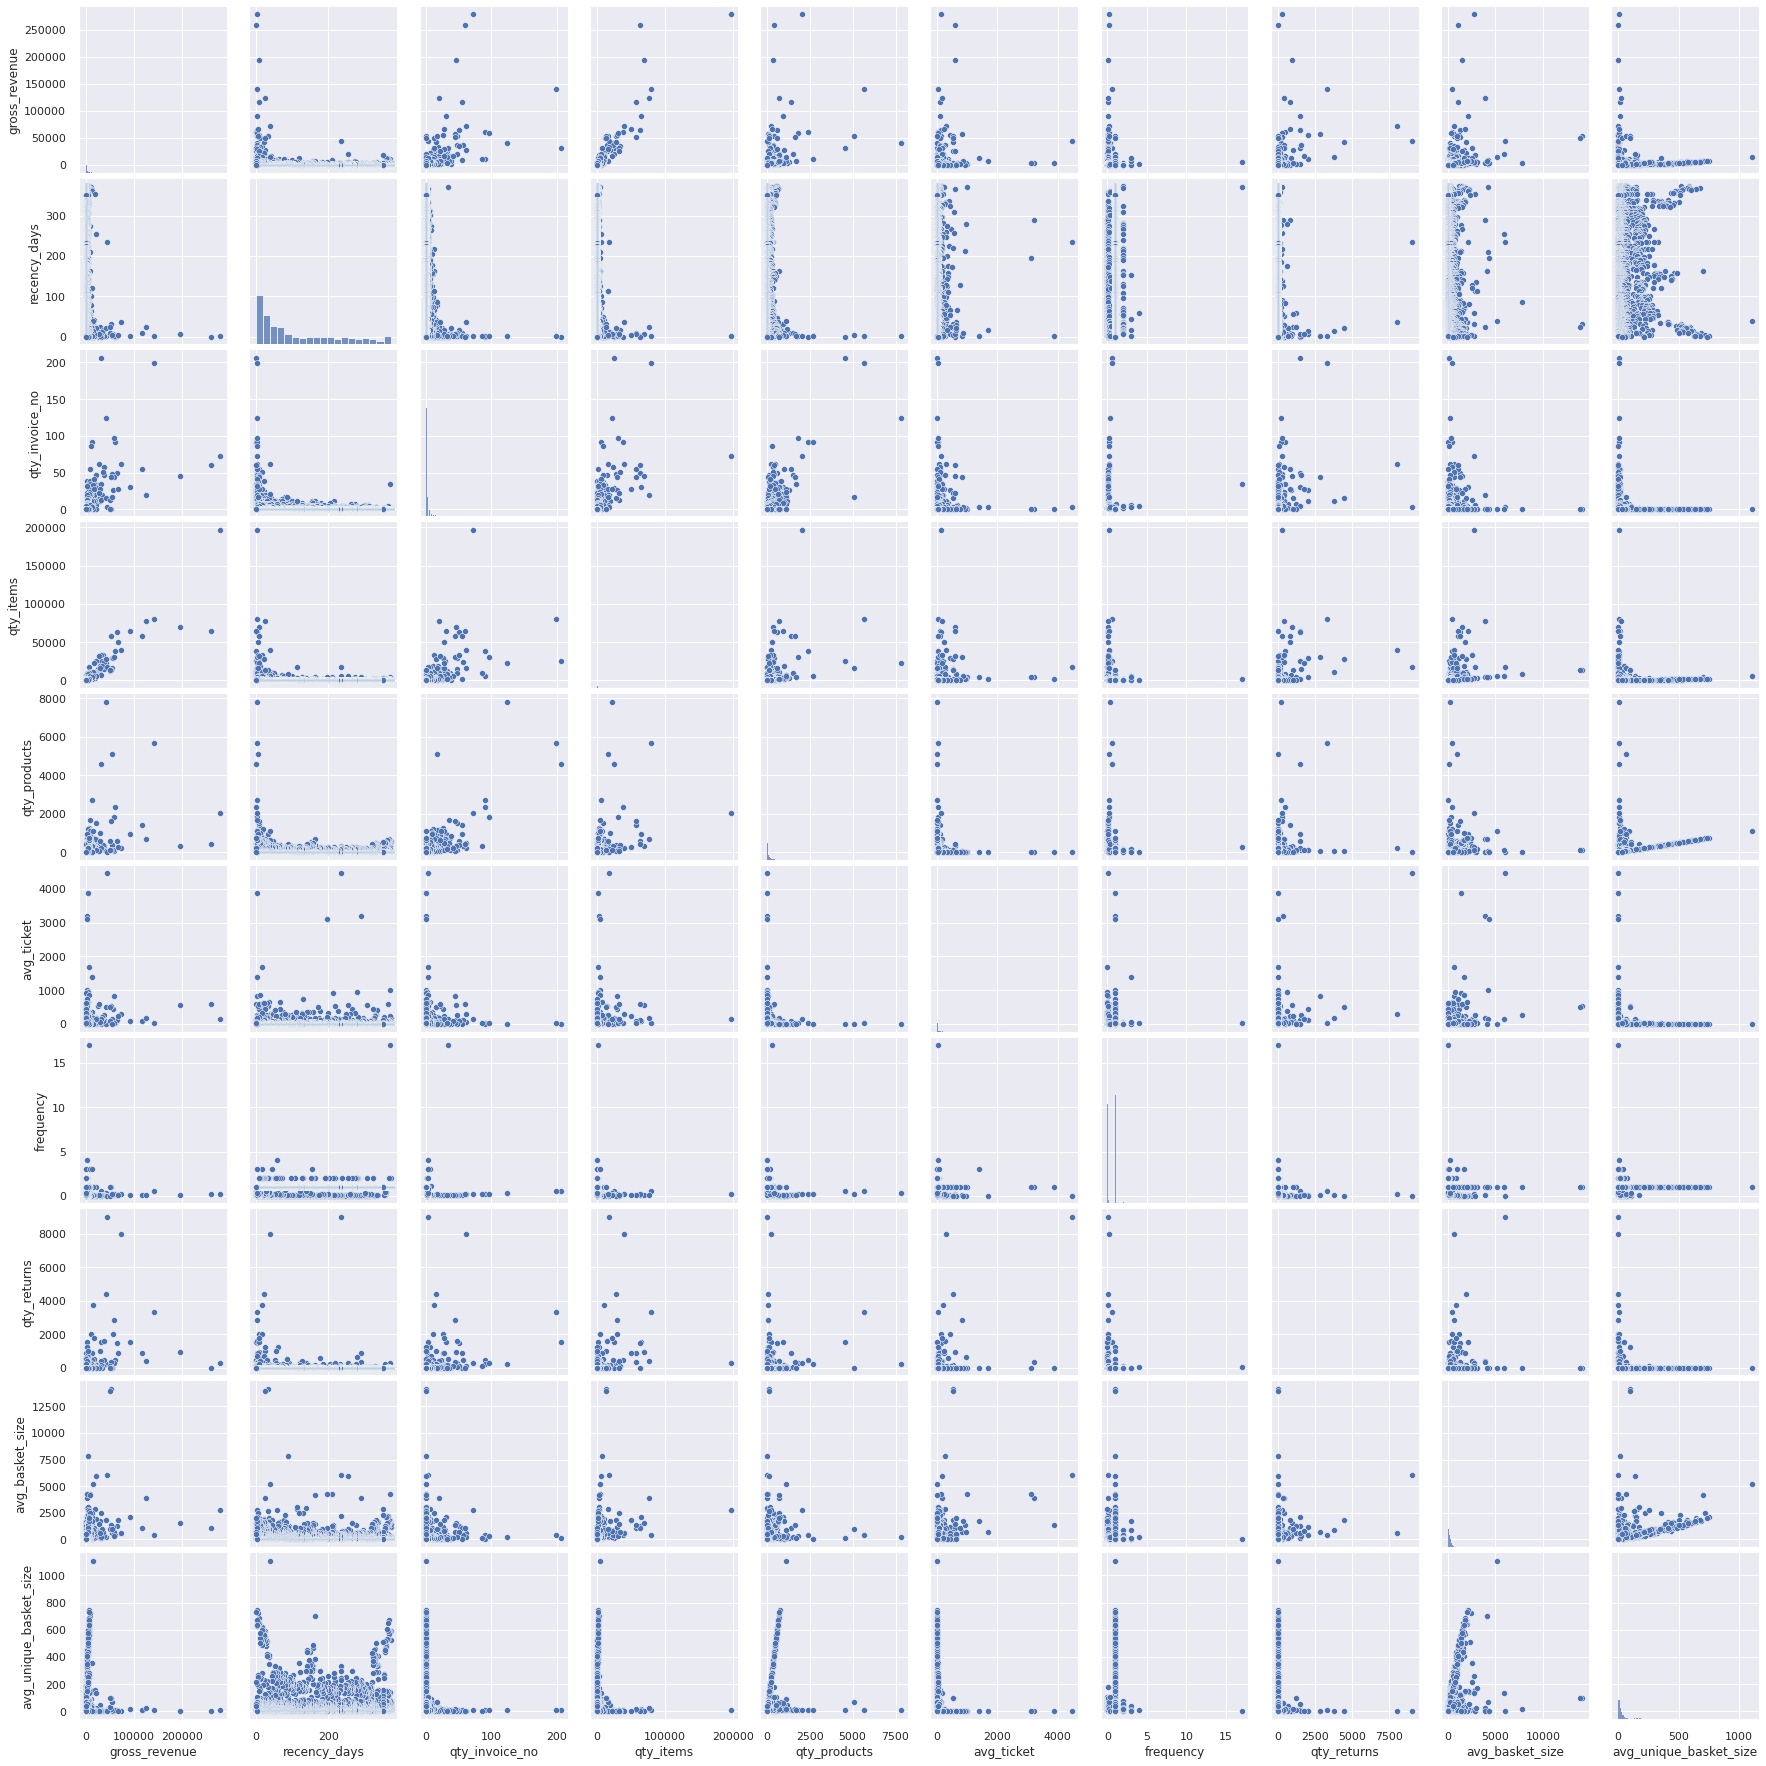

In [56]:
plt.figure( figsize = (25, 12))
sns.pairplot(df32);

**Notes**

 1. Frequency has low variance
 2. Avg ticket has low variance
 3. 
 

## Space Study

In [57]:
df3.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,0.073171,22.0,26.666667,0.333333


**Annotations:**

- cols selected with qty_invoice_no and qty_items

- need to do feature selection with boruta or tree

In [58]:
# Original dataset
#df33 = df3.drop(columns = ['customer_id'], axis = '').copy()

# dataset with selected columns due feature selection based on its importance
cols_selected = ['gross_revenue', 'recency_days', 'qty_invoice_no', 'qty_items' ,'qty_products', 'frequency', 'qty_returns']
df33 = df3[cols_selected].copy()

In [59]:
mm = pp.MinMaxScaler()

df33['gross_revenue']          = mm.fit_transform(df33[['gross_revenue']])
# pickle.dump(mm, open('../src/features/gross_revenue_scaler.pkl', 'wb'))

df33['recency_days']           = mm.fit_transform(df33[['recency_days']])
# pickle.dump(mm, open('../src/features/recency_days_scaler.pkl', 'wb'))

df33['qty_invoice_no']         = mm.fit_transform(df33[['qty_invoice_no']])
# pickle.dump(mm, open('../src/features/qty_invoice_no_scaler.pkl', 'wb'))

df33['qty_items']              = mm.fit_transform(df33[['qty_items']])
# pickle.dump(mm, open('../src/features/qty_items_scaler.pkl', 'wb'))

df33['qty_products']           = mm.fit_transform(df33[['qty_products']])
# pickle.dump(mm, open('../src/features/qty_products_scaler.pkl', 'wb'))

df33['frequency']              = mm.fit_transform(df33[['frequency']])
# pickle.dump(mm, open('../src/features/frequency_scaler.pkl', 'wb'))

df33['qty_returns']           = mm.fit_transform(df33[['qty_returns']])
# pickle.dump(mm, open('../src/features/qty_returns_scaler.pkl', 'wb'))

# df33['avg_ticket']             = mm.fit_transform(df33[['avg_ticket']])
# df33['avg_recency_days']       = mm.fit_transform(df33[['avg_recency_days']])
# df33['avg_basket_size']        = mm.fit_transform(df33[['avg_basket_size']])
# df33['avg_unique_basket_size'] = mm.fit_transform(df33[['avg_unique_basket_size']])

X = df33.copy()

In [61]:
# checking if the scalling went through
df33.head()

,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,frequency,qty_returns
0,0.019312,0.997319,0.160976,0.008799,0.037770,1.000000,0.004438
1,0.011579,0.150134,0.039024,0.007056,0.021692,0.001345,0.003883
2,0.024020,0.005362,0.068293,0.025538,0.029476,0.002052,0.005547
3,0.003396,0.254692,0.019512,0.002225,0.003445,0.000734,0.000000
4,0.003137,0.892761,0.009756,0.000401,0.000255,0.003985,0.002441


#### PCA

In [62]:
X.shape[1]

7

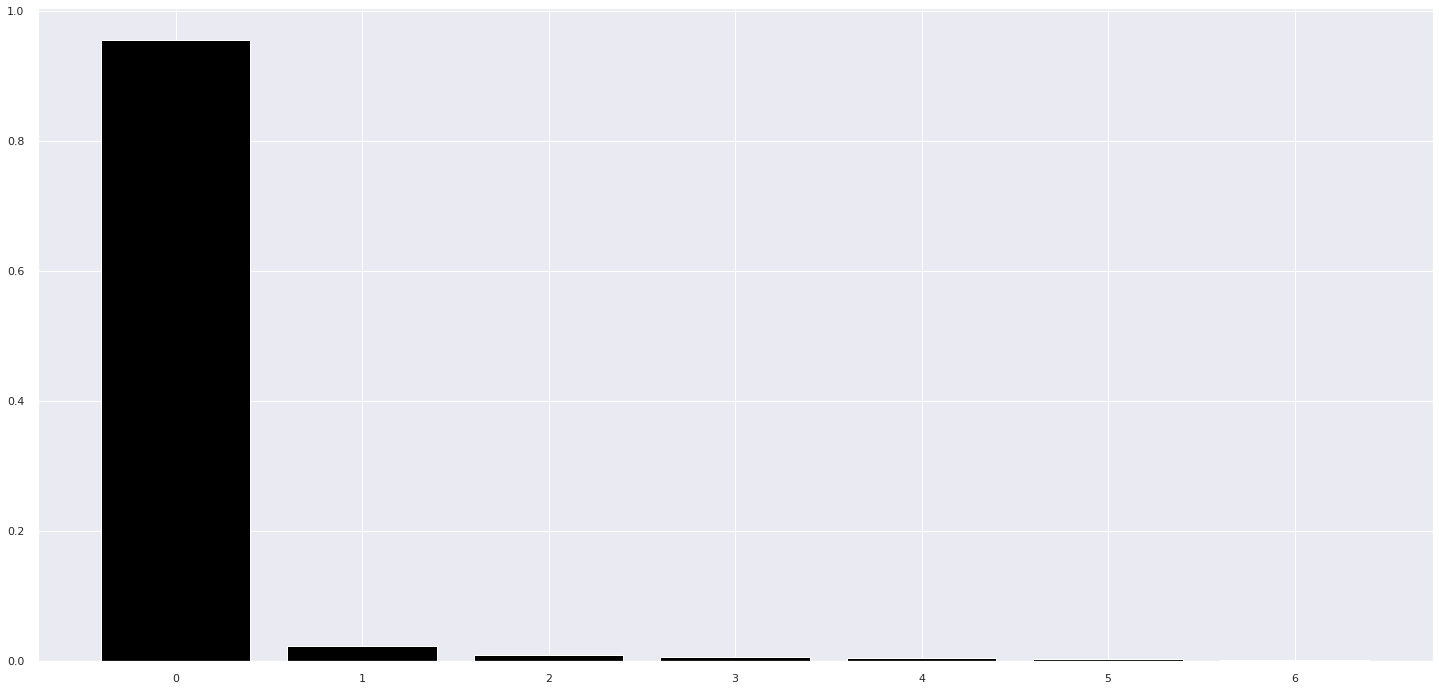

In [63]:
pca = dd.PCA( n_components = X.shape[1])

principal_components = pca.fit_transform(X)

# plot explained variables
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color = 'black') #quais componentes principais com a maior variação de dados

# pca component
df_pca = pd.DataFrame( principal_components )

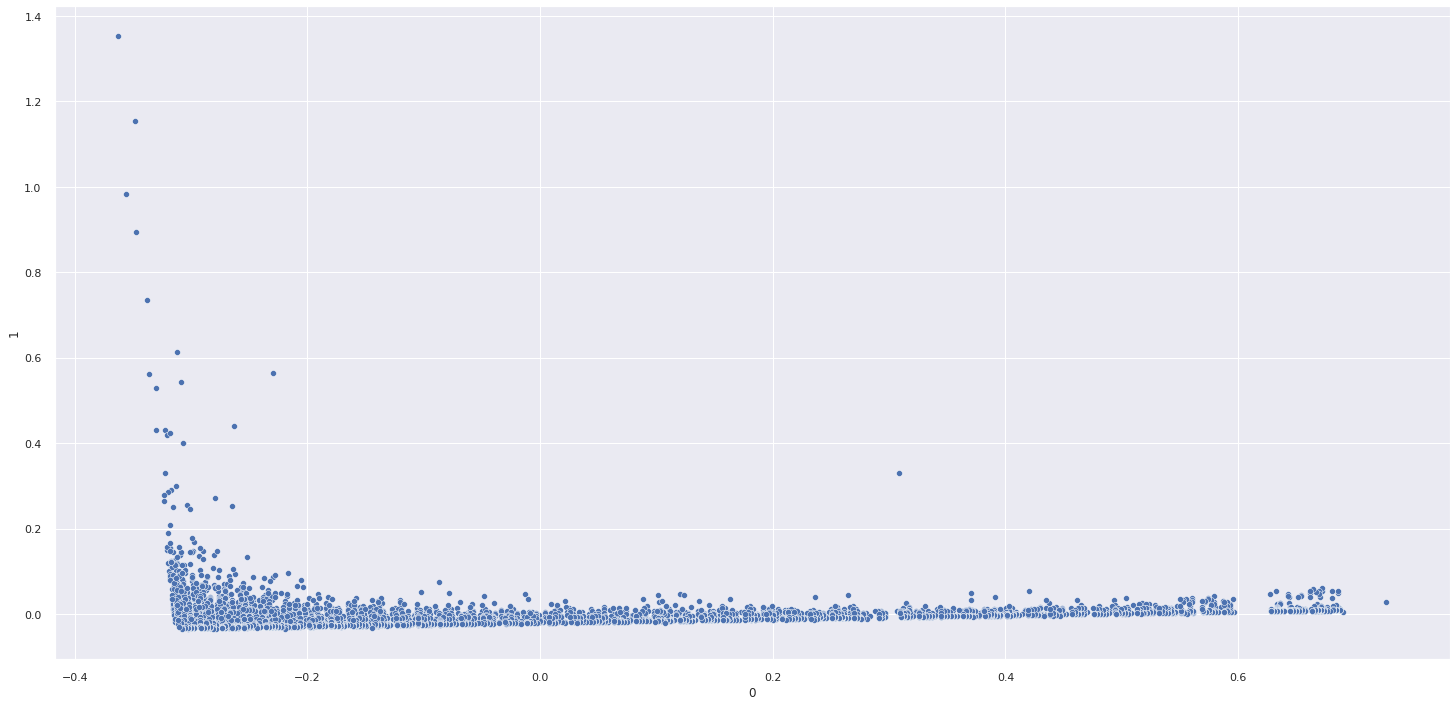

In [64]:
sns.scatterplot(x = 0, y = 1, data = df_pca);

In [65]:
df_pca.head()

,0,1,2,3,4,5,6
0,0.727327,0.027209,0.903371,0.200535,0.087976,-0.185445,0.000433
1,-0.165558,0.021412,-0.021759,0.006328,0.002399,-0.006443,0.002323
2,-0.311388,0.049836,-0.011196,0.007873,-0.000448,-0.018090,-0.004275
3,-0.060187,-0.000561,-0.029172,-0.003596,-0.000371,-0.008036,0.000819
4,0.577083,0.018784,-0.056470,-0.007776,-0.000511,-0.005375,0.001814


#### UMAP

##### UMAP without features qty_invoice_no & qty_items (old umap)

In [66]:
reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(X) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

#embedding
df_umap['embedding_X'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

#plot UMAP - cluster projetado de alta dimencionalidade
sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
                data = df_umap);

NameError: name 'df_umap' is not defined

##### UMAP with features qty_invoice_no & qty_items

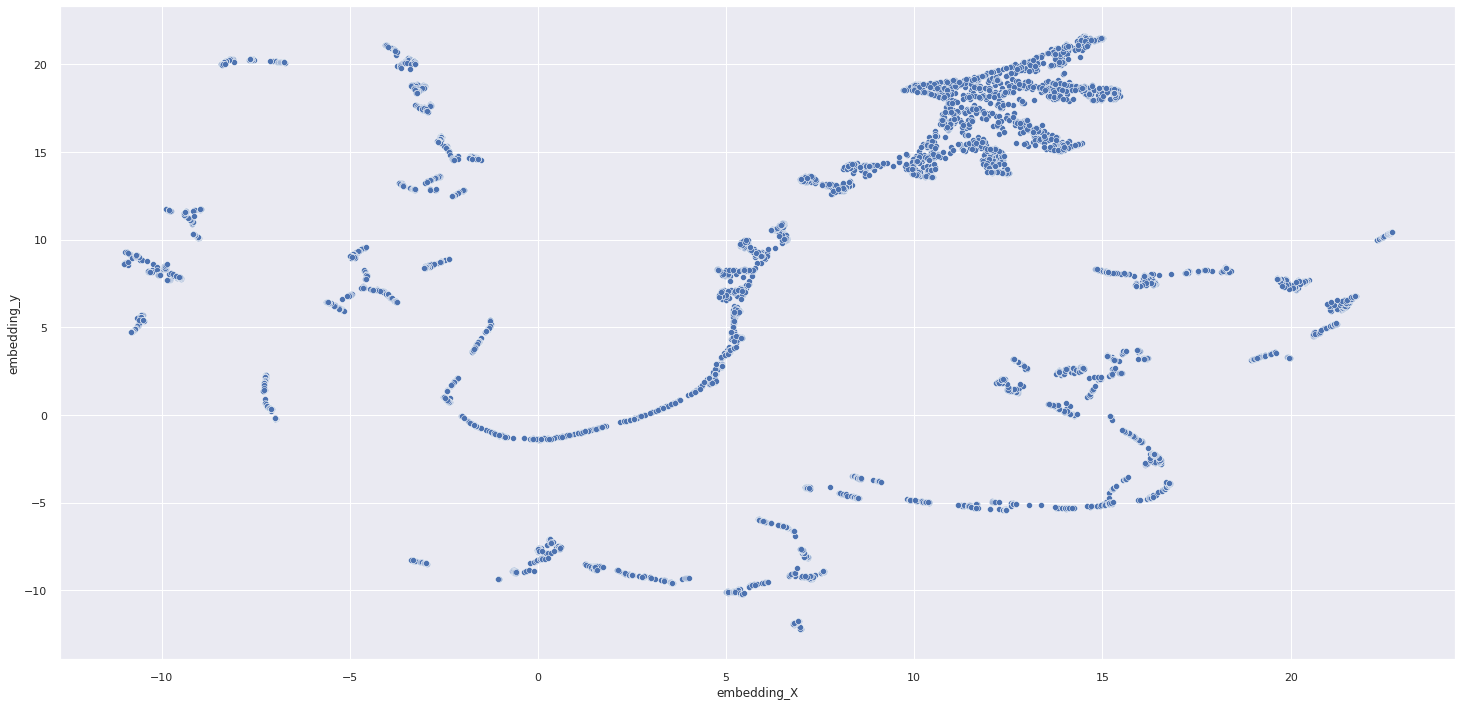

In [67]:
reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(X) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

#embedding
df_umap = pd.DataFrame()
df_umap['embedding_X'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

#plot UMAP - cluster projetado de alta dimencionalidade
sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
                data = df_umap);

#### t-SNE

##### t-SNE without features qty_invoice_no & qty_items

In [ ]:
reducer = mn.TSNE( n_components = 2, n_jobs = -1, random_state = 42)
embedding = reducer.fit_transform(X) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

#embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_X'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

#plot UMAP - cluster projetado de alta dimencionalidade
sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
                data = df_tsne);

##### t-SNE with features qty_invoice_no & qty_items

/home/marxcerqueira/.pyenv/versions/3.9.2/envs/HighValue-Customers/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/marxcerqueira/.pyenv/versions/3.9.2/envs/HighValue-Customers/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


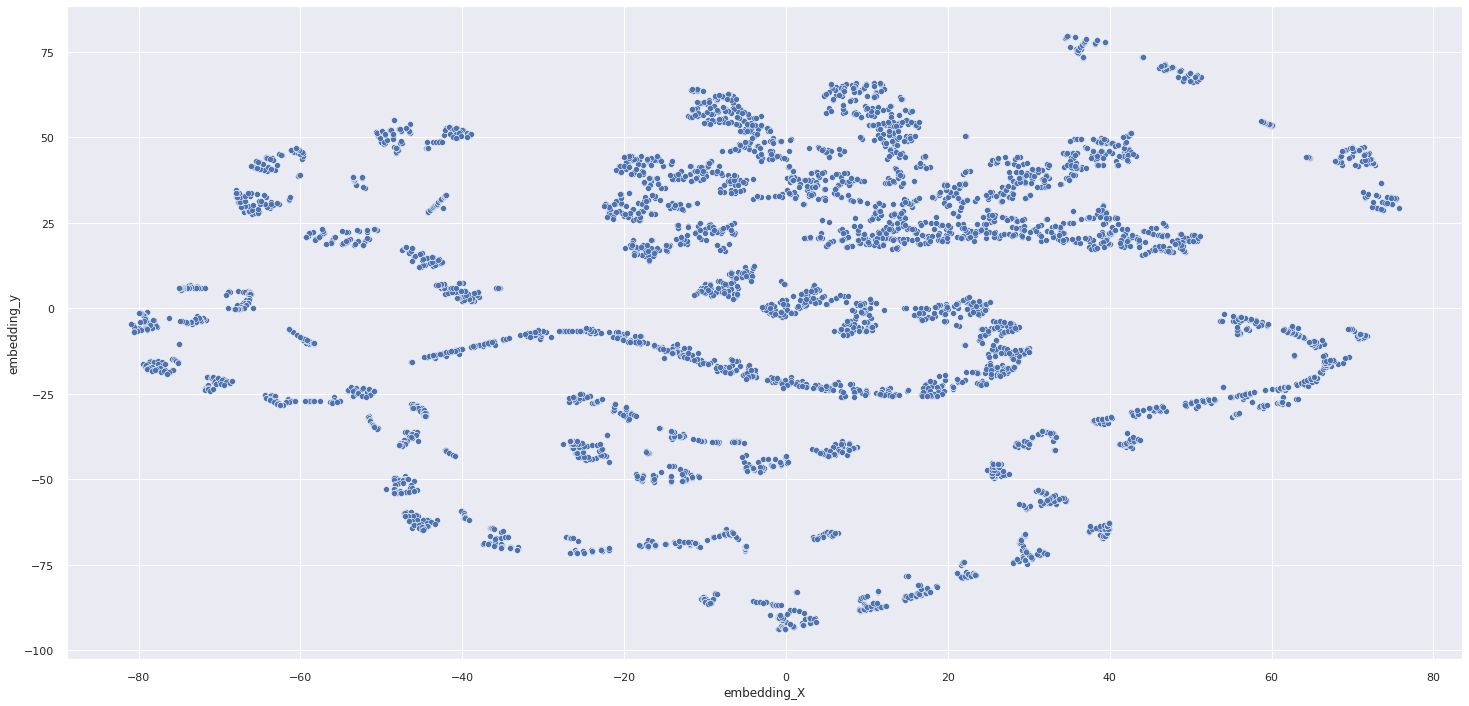

In [68]:
reducer = mn.TSNE( n_components = 2, n_jobs = -1, random_state = 42)
embedding = reducer.fit_transform(X) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

#embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_X'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

#plot UMAP - cluster projetado de alta dimencionalidade
sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
                data = df_tsne);

#### Tree-Based Embedding

In [ ]:
df33.head()

In [ ]:
# # feature selection using boruta

# # training dataset 
# X = df33.drop(columns = ['gross_revenue'], axis = 1).copy() #target variable
# y = df33['gross_revenue'].copy()

# # creating training and test dataset for Boruta, because it can't be a dataframe type
# X_boruta = X.values
# y_boruta = y.values

# # Define RandomForestRegressor
# rf = RandomForestRegressor( n_jobs=-1, n_estimators = 500 )

# # Define Boruta
# boruta = BorutaPy( rf, n_estimators='auto', verbose=2, random_state=42 ).fit( X_boruta, y_boruta )

In [ ]:
cols_selected = boruta.support_.tolist()

X_fs = df33.drop(columns = ['gross_revenue'], axis = 1).copy()
cols_selected_boruta = X_fs.iloc[ :, cols_selected].columns.tolist()

# Not selected boruta features
cols_not_selected_boruta = np.setdiff1d(X_fs.columns, cols_selected_boruta)

In [ ]:
cols_selected_boruta

In [ ]:
cols_not_selected_boruta

In [69]:
# training dataset 
X = df33.drop(columns = ['gross_revenue'], axis = 1).copy() #target variable
y = df33['gross_revenue'].copy()

# model definition
rf_model = en.RandomForestRegressor(n_estimators = 100, random_state = 42)

# model training
rf_model.fit(X,y)

# dataframe leaf
df_leaf = pd.DataFrame(rf_model.apply( X ))

In [ ]:
df_leaf.shape

In [ ]:
df_leaf.head()

    y = nũmero de estimadores, quantidade árvores (decision tree cada coluna)
    x = clientes
    xy (pontos dentro da matriz) = posição da folha que o cliente caiu em cada árvore
    
    irá diminuir a explicabilidade do modelo porem aumenta a performance, pelo espaço de embedding com clusters bem espaçados e concentrados

In [ ]:
# # using UMAP to reduce the space study from 100 to 2
# reducer = umap.UMAP(random_state = 42)
# embedding = reducer.fit_transform(df_leaf) #gera o espaço projetado - embedding é a projeção gerada em outro espaço 

# #embedding
# df_tree = pd.DataFrame()
# df_tree['embedding_X'] = embedding[:, 0]
# df_tree['embedding_y'] = embedding[:, 1]

# #plot UMAP - cluster projetado de alta dimencionalidade
# sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
#                 data = df_tree);

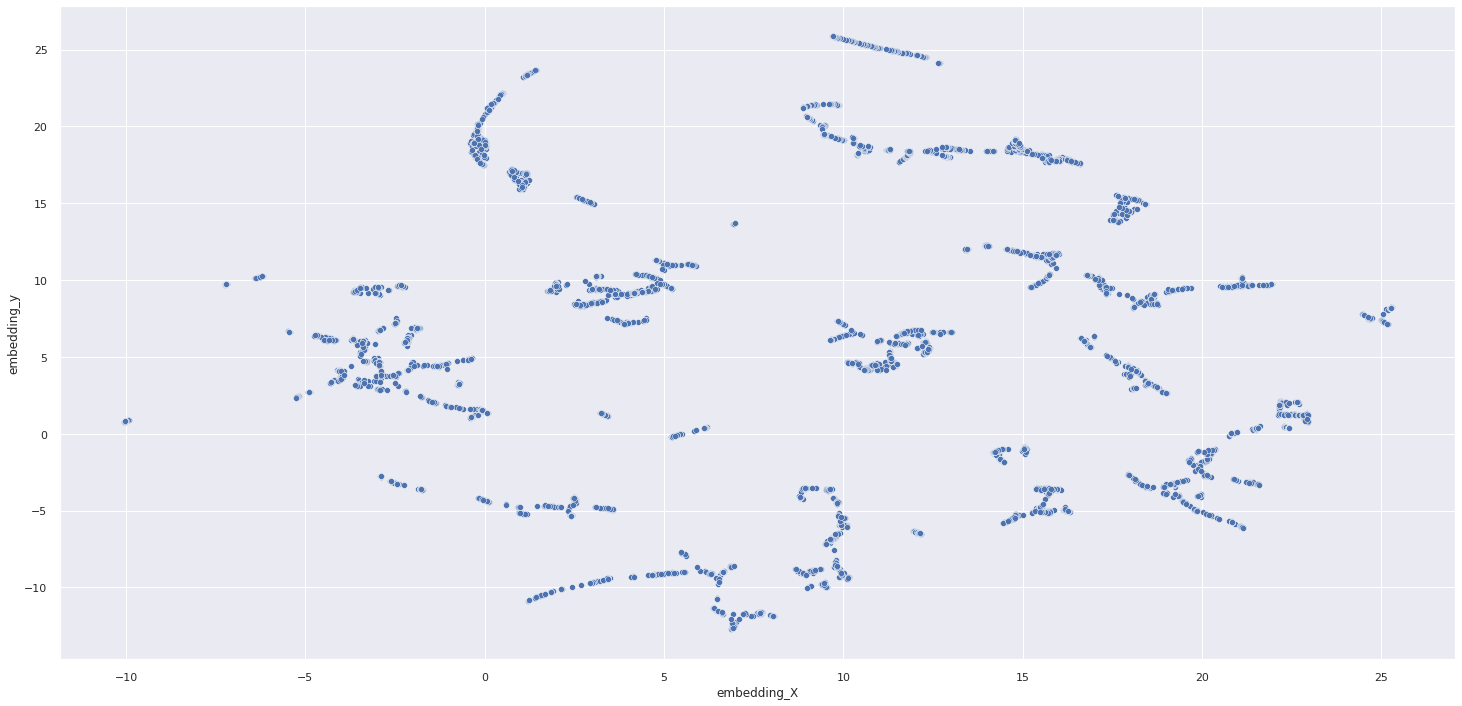

In [70]:
# new UMAP space with qty and invoice_no features
# using UMAP to reduce the space study from 100 to 2
reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(df_leaf) #gera o espaço projetado - embedding é a projeção gerada em outro espaço 

#embedding
df_tree = pd.DataFrame()
df_tree['embedding_X'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

#plot UMAP - cluster projetado de alta dimencionalidade
sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
                data = df_tree);

# DATA PREPARATION

**Rules**

1. Distribuição Normal e não possui Outlier --> Standard Scaler - Média e desvio padrão, outliers influenciam na média
2. Distribuilção Normal e possui Outlier --> Robust Scaler -  Quartis, robusto à outliers
3. Não distribuição normal --> MinMax Scaler


**Testes de Normalidade:**
    
    QQ-plot - Quantile Quantile PLot (Quantile teorica x Quantile real)
    
    KS Test - Kolgomorov Smirnoff (Teste de Hipótese). Se o p-value > 0.5 -> Distribuição Normal, p-value <0.5 -> Não distribuição normal
    
**Detecção Outlier:**

    Box-plot --> pontos são identificados como Outliers
    
    IRQ*2.5 --> Acima desse valor (Outlier)
    
    Z-score < -3 e Z-score > 3 --> Outliers

In [71]:
# df4 = df3.copy()
df4 = df_tree.copy()

In [ ]:
# df4_aux = df4.copy()

In [72]:
# Tree-Based Embbeding
df4 = df_tree.copy()

# # UMAP Embbeding
# df4 = df_umap.copy()

# # TSNE Embedding
# df4 = df_tsne.copy()

## Feature Rescaling

In [ ]:
# ## MinMax Scaler
# mm = pp.MinMaxScaler()
# ss = pp.StandardScaler()
# rs = pp.RobustScaler()

# df4['gross_revenue']          = mm.fit_transform(df4[['gross_revenue']])
# df4['recency_days']           = mm.fit_transform(df4[['recency_days']])
# # df4['qty_invoice_no']         = mm.fit_transform(df4[['qty_invoice_no']])
# # df4['qty_items']              = mm.fit_transform(df4[['qty_items']])
# df4['qty_products']           = mm.fit_transform(df4[['qty_products']])
# # df4['avg_ticket']             = mm.fit_transform(df4[['avg_ticket']])
# # df4['avg_recency_days']       = mm.fit_transform(df4[['avg_recency_days']])
# df4['frequency']              = mm.fit_transform(df4[['frequency']])
# df4['qty_returns']           = mm.fit_transform(df4[['qty_returns']])
# # df4['avg_basket_size']        = mm.fit_transform(df4[['avg_basket_size']])
# # df4['avg_unique_basket_size'] = mm.fit_transform(df4[['avg_unique_basket_size']])

# variable = 'gross_revenue'

# FEATURE SELECTION

In [ ]:
# cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qty_products', 'frequency', 'qty_returns']

In [ ]:
# df5 = df4[cols_selected].copy()
df5 = df_tree.copy()

# HYPERPARAMETER FINE-TUNNING

In [ ]:
df6 = df5.copy()

In [73]:
# Tree-Based Embbeding
X = df_tree.copy()

# UMAP Embbeding
# X = df_umap.copy()

# TSNE Embedding
# X = df_tsne.copy()

In [74]:
X.head()

,embedding_X,embedding_y
0,5.217471,9.462402
1,3.348260,8.671559
2,-0.171162,20.161715
3,8.738938,-8.936374
4,19.068232,9.256424


In [75]:
clusters = np.arange(2, 31, 1) #silhouette was increasing, so we put more k points
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

## K-Means

In [76]:
kmeans_sil = []

for k in clusters:
    # model definition
    kmeans_model = c.KMeans( n_clusters = k, n_init = 100, random_state = 42 )

    # model training
    kmeans_model.fit(X)

    # model predict
    labels = kmeans_model.predict(X)

    # model performance
    sil = m.silhouette_score( X, labels, metric = 'euclidean')
    kmeans_sil.append(sil)  

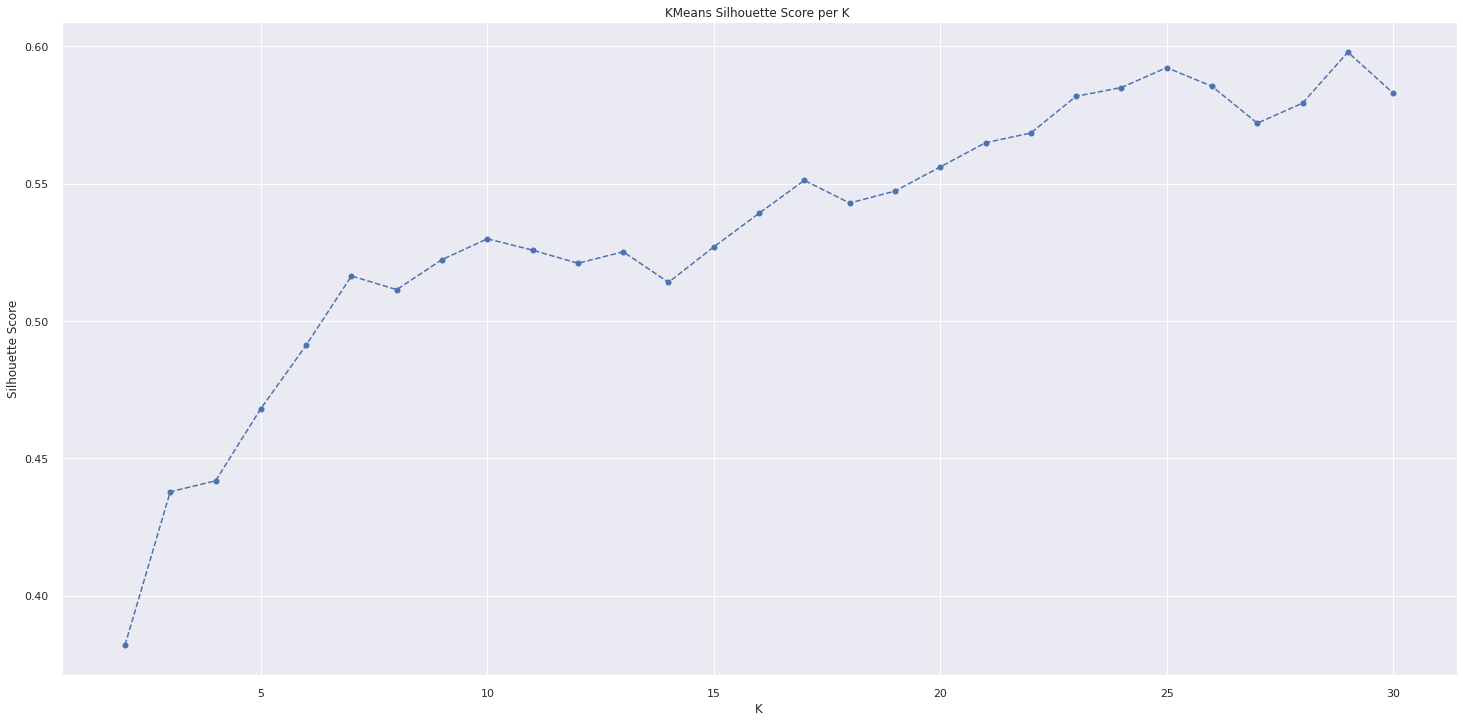

In [77]:
plt.plot( clusters, kmeans_sil, linestyle = '--', marker = 'o', color = 'b' )
plt.xlabel( 'K' );
plt.ylabel('Silhouette Score');
plt.title('KMeans Silhouette Score per K ');

## GMM

In [78]:
gmm_sil = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture(n_components = k, n_init = 100, random_state = 42)
    
    # model training
    gmm_model.fit(X)
    
    # model prediction
    labels = gmm_model.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric = 'euclidean')
    gmm_sil.append(sil)

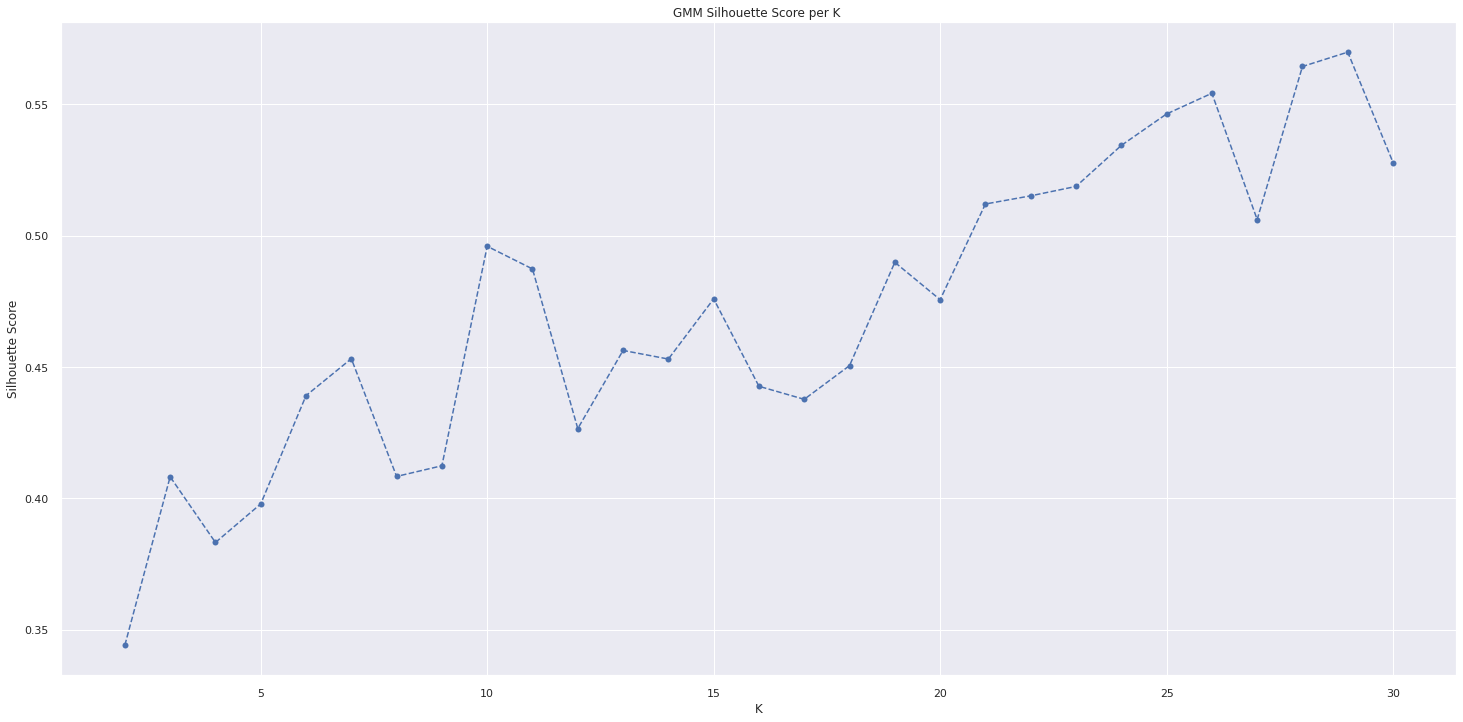

In [79]:
plt.plot(clusters, gmm_sil, linestyle = '--', marker = 'o', color = 'b')
plt.xlabel( 'K' );
plt.ylabel('Silhouette Score');
plt.title('GMM Silhouette Score per K ');

## Hierarchical Clustering

In [80]:
# model definition and training
hc_model = hc.linkage(X, 'ward')

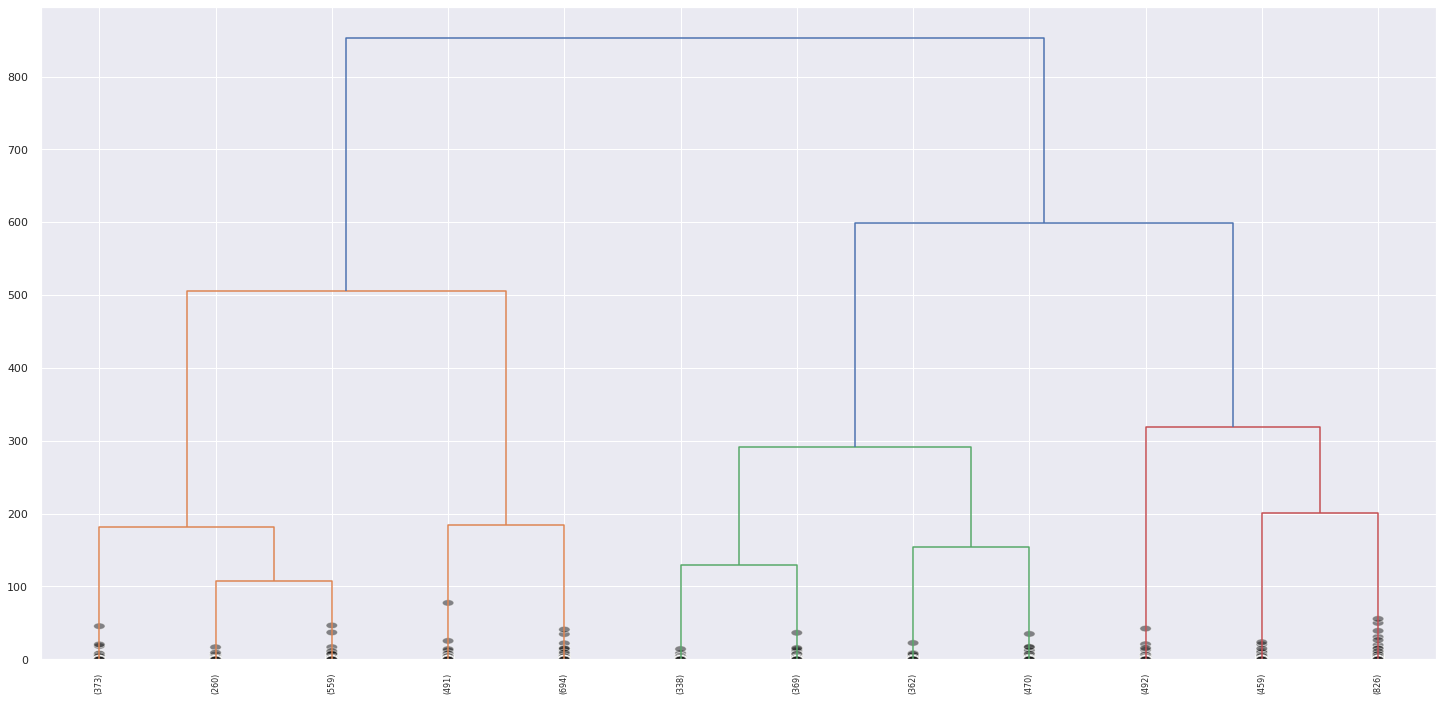

In [81]:
hc.dendrogram(hc_model,
              truncate_mode = 'lastp',
              p = 12,
              leaf_rotation = 90,
              leaf_font_size = 8,
              show_contracted = True)

plt.show()

### H-Clustering Silhouette Score

In [82]:
hc_sil = []
for k in clusters:
    #model definition and training
    hc_model = hc.linkage(X, 'ward')

    # model predict
    labels = hc.fcluster(hc_model, k, criterion = 'maxclust')

    # metrics
    sil = m.silhouette_score(X, labels, metric = 'euclidean')
    hc_sil.append(sil)

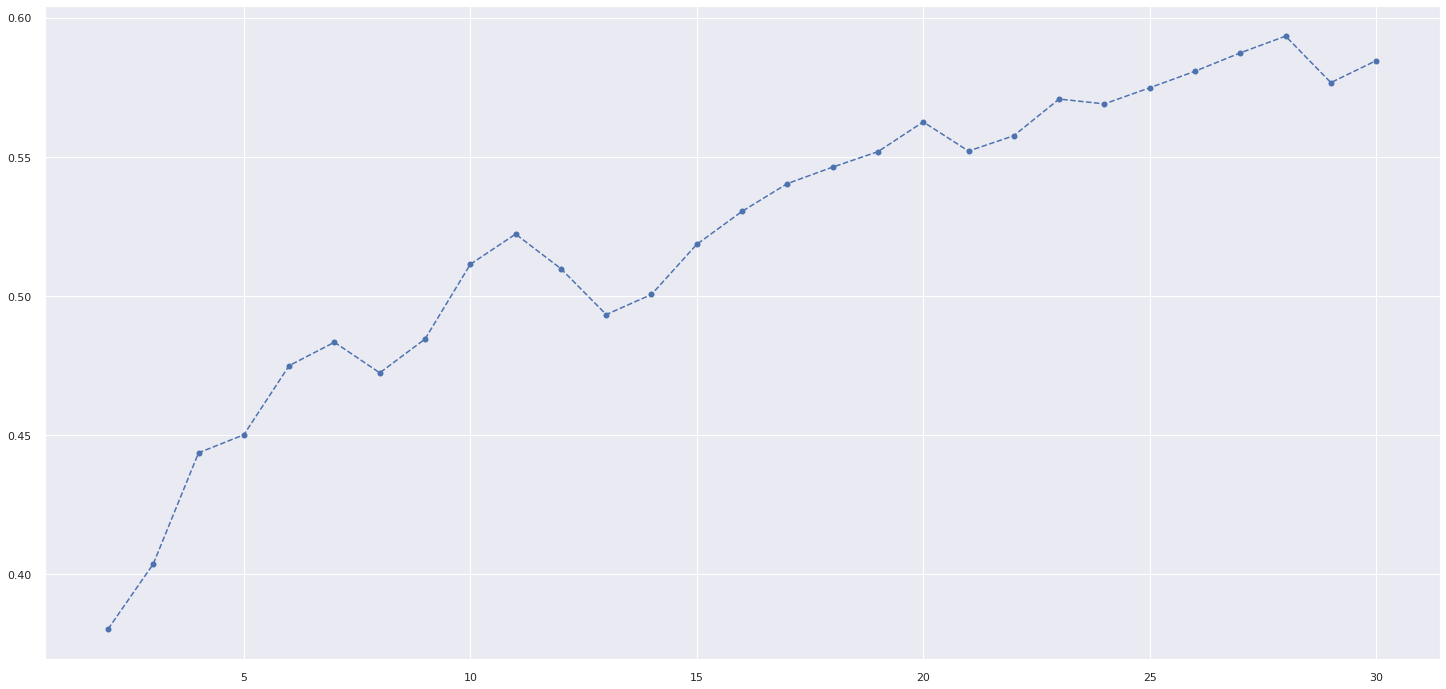

In [83]:
plt.plot(clusters, hc_sil, linestyle = '--', marker = 'o', color = 'b')

## Results

In [84]:
## Results - Tree Based Embedding
df_results = pd.DataFrame({'KMeans:': kmeans_sil,
                           'GMM': gmm_sil,
                           'HC': hc_sil}
                           ).T

df_results.columns = clusters
df_results.style.highlight_max(color = 'lightgreen', axis = 1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
KMeans:,0.382024,0.437862,0.441842,0.468124,0.491189,0.516383,0.511427,0.522348,0.529936,0.525791,0.521021,0.525206,0.514086,0.526977,0.539219,0.551204,0.542952,0.547281,0.556083,0.564909,0.568417,0.581803,0.584986,0.592242,0.585421,0.572000,0.579310,0.597869,0.582951
GMM,0.344133,0.408239,0.383221,0.397906,0.439133,0.453193,0.408371,0.412431,0.495997,0.487362,0.426587,0.456332,0.453063,0.475974,0.442685,0.437730,0.450556,0.489890,0.475667,0.512089,0.515198,0.518774,0.534382,0.546374,0.554246,0.506184,0.564443,0.569910,0.527885
HC,0.380203,0.403636,0.443598,0.450081,0.474936,0.483351,0.472340,0.484496,0.511369,0.522224,0.509800,0.493302,0.500512,0.518540,0.530405,0.540374,0.546310,0.551858,0.562549,0.552073,0.557595,0.570773,0.569033,0.574820,0.580765,0.587373,0.593393,0.576684,0.584593


In [ ]:
# ## Results - UMAP Embedding
# df_results = pd.DataFrame({'KMeans:': kmeans_sil,
#                            'GMM': gmm_sil,
#                            'HC': hc_sil}
#                            ).T

# df_results.columns = clusters
# df_results.style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
# ## Results - t-SNE Embedding
# df_results = pd.DataFrame({'KMeans:': kmeans_sil,
#                            'GMM': gmm_sil,
#                            'HC': hc_sil}
#                            ).T

# df_results.columns = clusters
# df_results.style.highlight_max(color = 'lightgreen', axis = 1)

## Silhouette Analysis

In [ ]:
fig, ax = plt.subplots(6, 2)
fig.set_size_inches(25,30)

for k in clusters:
    q, mod = divmod(k, 2)
    
    ax[q-1, mod].set_xlim([-0.1, 1])
    ax[q-1, mod].set_ylim([0, len(X) + (k+1)*10])
    
    # model definition and training
    hc_model = hc.linkage(X, 'ward')

    # model predict
    labels = hc.fcluster(hc_model, k, criterion = 'maxclust')

    # model performance
    ss = m.silhouette_score(X, labels, metric = 'euclidean')
    print('For K = {}. Silhouette Score: {}'.format(k, ss))
    
    samples_silhouette_values = m.silhouette_samples(X, labels)
    
    y_lower = 10
    
    for i in range(k):
        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap('Spectral')
        color = cmap(i/k)
        
        ax[q-1, mod].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_samples_silhouette_values)
        
        y_lower = y_upper + 10
    
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks([-0.1, 0.2, 0.4, 0.6, 0.8, 1])
        

## Whitin-Cluster Sum of Square (WSS)

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit(X)
kmeans.show();
# quero clusters condensados (distancia do centroide e pontos no mesmo cluster pequena) e espaçados (distancia entre centroides de clusters alta). ONde consigo? Onde há maior variação (elbow)

## Sillhouette Score

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, metric = 'silhouette', timings = False)
kmeans.fit(X)
kmeans.show();

### Silhouette Analysis

In [ ]:
fig, ax = plt.subplots(6, 2, figsize = (25, 18))

for k  in clusters:
    km = c.KMeans(n_clusters = k, init = 'random', n_init = 100, max_iter = 100, random_state = 42)
    #truque: divisão com moda (para visualizacao)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize();

# MACHINE LEARNING MODEL TRAINING

## K-Means

In [85]:
k = 9;

In [ ]:
# # model definition
# kmeans = c.KMeans(init = 'random', n_clusters = k, n_init = 100, max_iter = 300, random_state = 42)

# # model training
# kmeans.fit(X)

# # clustering
# labels = kmeans.labels_

In [86]:
# trying with GMM beacuse of its approach in the embedding space

# model definition
gmm_model = mx.GaussianMixture(n_components = k,n_init = 50, max_iter = 300 ,random_state=42)

# model training
gmm_model.fit(X)

# model prediction
labels = gmm_model.predict(X)

## Cluster Validation

In [87]:
# WSS (Within-cluster Sum of Square )
# print('WSS score: {}'.format(kmeans.inertia_))

# SS (Silhouette Score)
print('SS score: {}'.format(m.silhouette_score(X, labels, metric = 'euclidean')))

SS score: 0.4598197638988495


# CLUSTER ANALYSIS

In [88]:
df9 = X.copy()
df9['cluster'] = labels
df9.head()

,embedding_X,embedding_y,cluster
0,5.217471,9.462402,4
1,3.348260,8.671559,4
2,-0.171162,20.161715,6
3,8.738938,-8.936374,2
4,19.068232,9.256424,0


## Visualization Inspection

In [ ]:
# k = 10 for Kmeans
sns.scatterplot(x = 'embedding_X', y = 'embedding_y', hue = 'cluster', data = df9, palette = 'deep');

In [ ]:
# k=10 for GMM
sns.scatterplot(x = 'embedding_X', y = 'embedding_y', hue = 'cluster', data = df9, palette = 'deep');

In [ ]:
# k = 9 for kmeans
sns.scatterplot(x = 'embedding_X', y = 'embedding_y', hue = 'cluster', data = df9, palette = 'deep');

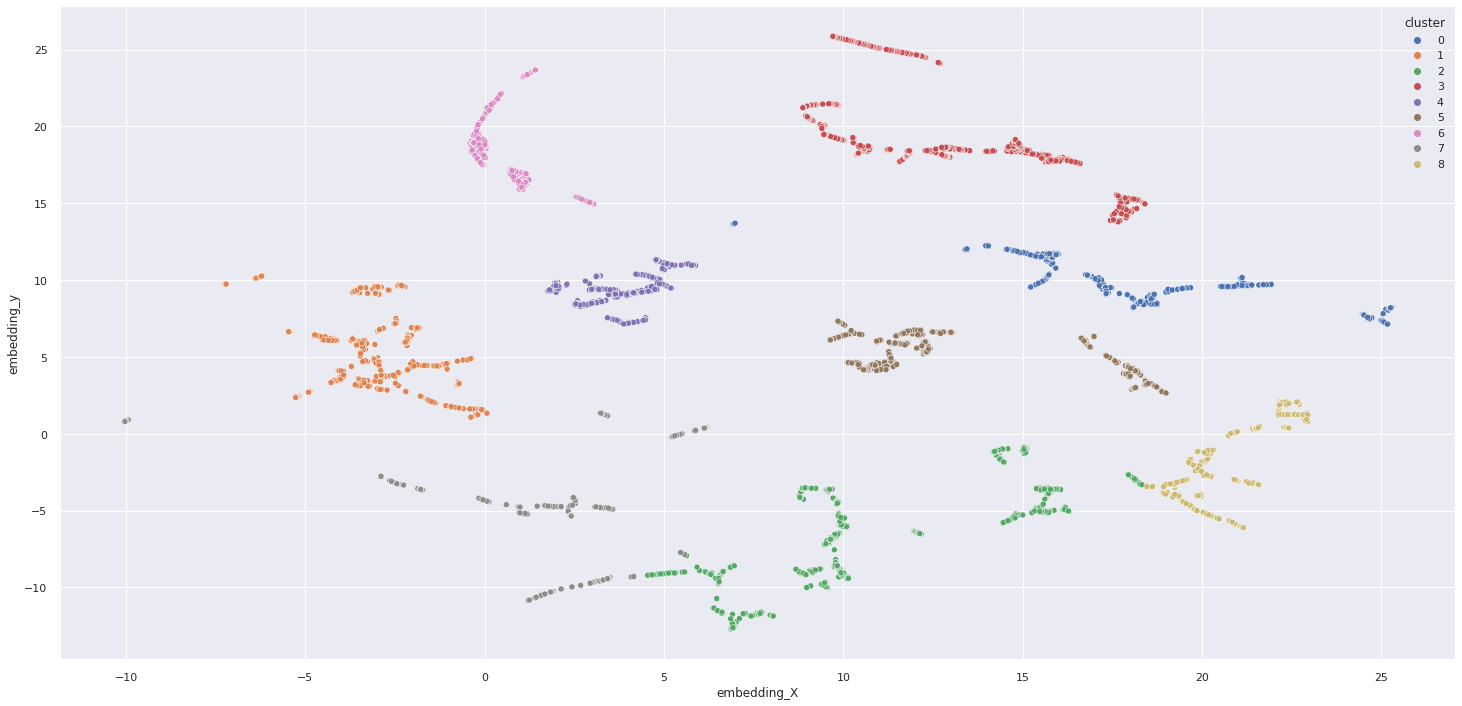

In [89]:
# k = 9 for GMM
sns.scatterplot(x = 'embedding_X', y = 'embedding_y', hue = 'cluster', data = df9, palette = 'deep');

In [ ]:
# k = 8 for kmeans
sns.scatterplot(x = 'embedding_X', y = 'embedding_y', hue = 'cluster', data = df9, palette = 'deep');

In [ ]:
# k = 8 for GMM
sns.scatterplot(x = 'embedding_X', y = 'embedding_y', hue = 'cluster', data = df9, palette = 'deep');

## Cluster Profile

Where we do an analysis of the clusters

calcula o ponto em que vai representar o clusters.

sempre a representação do customer é em relação ao ponto médio (centróide)

In [90]:
cols_selected = ['customer_id','gross_revenue', 'recency_days', 'qty_invoice_no', 'qty_items' ,'qty_products', 'frequency', 'qty_returns']
df92 = df3[cols_selected].copy()
df92['cluster'] = labels
df92.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,frequency,qty_returns,cluster
0,17850,5391.21,372.0,34.0,1733.0,297.0,17.000000,40.0,4
1,13047,3232.59,56.0,9.0,1390.0,171.0,0.028302,35.0,4
2,12583,6705.38,2.0,15.0,5028.0,232.0,0.040323,50.0,6
3,13748,948.25,95.0,5.0,439.0,28.0,0.017921,0.0,2
4,15100,876.00,333.0,3.0,80.0,3.0,0.073171,22.0,0


In [91]:
# Explaining clusters profile based on this averages
# Number of customer
df_cluster = df92[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index().rename(columns = {'customer_id': 'qty_customers'})
df_cluster['perc_customer'] = 100*( df_cluster['qty_customers'] / df_cluster['qty_customers'].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df92[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )

# Avg recency days
df_avg_recency_days = df92[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster' )

# Qty invoice number
df_avg_invoice_no = df92[['qty_invoice_no', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_invoice_no, how='inner', on='cluster' )

# Avg qty items
df_avg_qty_items = df92[['qty_items', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_qty_items, how='inner', on='cluster' )

# Avg qty products
df_qty_products = df92[['qty_products', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_qty_products, how='inner', on='cluster' )

# Frequency
df_frequency = df92[['frequency', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_frequency, how='inner', on='cluster' )

# Avg qty returns
df_qty_returns = df92[['qty_returns', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_qty_returns, how='inner', on='cluster' )

df_cluster.sort_values('gross_revenue', ascending = False)

,cluster,qty_customers,perc_customer,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,frequency,qty_returns
6,6,492,8.642192,10932.727561,29.932927,14.853659,6429.219512,354.298780,0.114133,147.386179
4,4,441,7.746355,2846.196893,57.585034,5.879819,1562.013605,201.986395,0.219047,18.981859
1,1,801,14.069910,1762.174370,66.725343,4.078652,890.731586,121.353308,0.235948,14.742821
7,7,540,9.485333,1046.922870,96.105556,2.822222,482.085185,101.818519,0.370125,8.801852
2,2,1015,17.828913,770.024266,123.681773,1.887685,340.243350,61.985222,0.570043,3.222660
8,8,549,9.643422,440.091548,132.185792,1.721311,180.863388,44.990893,0.629429,1.670310
0,0,574,10.082558,278.275401,146.479094,1.461672,124.428571,12.996516,0.691504,2.341463
5,5,574,10.082558,272.509495,177.909408,1.113240,116.247387,21.947735,0.961863,1.329268
3,3,707,12.418760,52.769477,191.830269,1.038190,13.371994,5.879774,0.987351,0.079208


* Cluster 6: Champions
* Cluster 4: Almost Champions
* Cluster 1: Must buy more frequently and more products
* Cluster 7: Must buy more expensive products
* Cluster 2: Must buy more items and different products
* Cluster 8: Churn 1
* Cluster 0: Churn 2
* Cluster 5: Churn 3
* Cluster 3: Churn 4

In [ ]:
# during the new EDA we can do a analyse inside each cluster

**High Value Customers Cluster(06):**

- Number of customers: 492 (8.64% of costumers)
- Avg Gross Revenue: **$10932.72**
- Avg Recency Average: **29 days**
- Avq of Qty of invoice no: **14.85**
- Avg of Qty of Items: **6429**
- Avg of Qty Products Purchased: **354 un**
- Purchase Frequency: **0.114 products per day**
- Avg of Qty of Retuned Items: **147 un**

# Exploratory Dada Analysis

In [92]:
df10 = df92.copy()

In [93]:
df10.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,frequency,qty_returns,cluster
0,17850,5391.21,372.0,34.0,1733.0,297.0,17.000000,40.0,4
1,13047,3232.59,56.0,9.0,1390.0,171.0,0.028302,35.0,4
2,12583,6705.38,2.0,15.0,5028.0,232.0,0.040323,50.0,6
3,13748,948.25,95.0,5.0,439.0,28.0,0.017921,0.0,2
4,15100,876.00,333.0,3.0,80.0,3.0,0.073171,22.0,0


## Hypotesis Mindmap

1. Fenomeno
2. Entidades (customer, location, finance, family)
3. Características da Entidade

- ter mais controle na EDA
- ser mais objetivo na criaçao de graficos p analise
- ser mais eficiente nas análises

## Business Hypothesis

Quais as 3 características de uma hipótese?

1. Afirmação ,pois permiti negar e validar, perguntas podem ter múltiplas respostas. Afirmacao refuto ou valido.
2. Comparação entre variáveis. Variável de interesse c outra variável (no caso clusters) comparação entre clusters com o insiders
3. Valor base de comparação (basicamente um chute para comparar)

## Hypothesis Prioritization

### purchase hypothesis

1. Os clientes do clusters insiders usam cartão de crédito em 80% das compras.
2. **Os clientes do cluster insiders possuem um ticket médio de 10% cima do cluisters More Products**
3. **Os clientes do cluster insiders possuem um basket size acima de 5 produtos**
4. **Os clientes do cluster insiders possuem um volume de compra acima de 10% do total de compras**
5. **Os clientes do cluster insiders tem um número de devolução abaixo da média da base total de clientes**

### H1: Champions cluster customers have a purchase volume (products) above 10% of their total purchases
**True**: The Champions cluster has a product purchase volume of 33.05% of the total product volume.

In [94]:
total_products_by_cluster = df10[['cluster', 'qty_products']].groupby('cluster').sum().reset_index()
total_products_by_cluster['perc_%'] =  100*total_products_by_cluster['qty_products']/total_products_by_cluster['qty_products'].sum()
total_products_by_cluster.style.format({'qty_products': '{0:,.2f}', 'perc_%': '{:.2f}'})

,cluster,qty_products,perc_%
0,0,"7,460.00",1.41
1,1,"97,204.00",18.43
2,2,"62,915.00",11.93
3,3,"4,157.00",0.79
4,4,"89,076.00",16.89
5,5,"12,598.00",2.39
6,6,"174,315.00",33.05
7,7,"54,982.00",10.42
8,8,"24,700.00",4.68


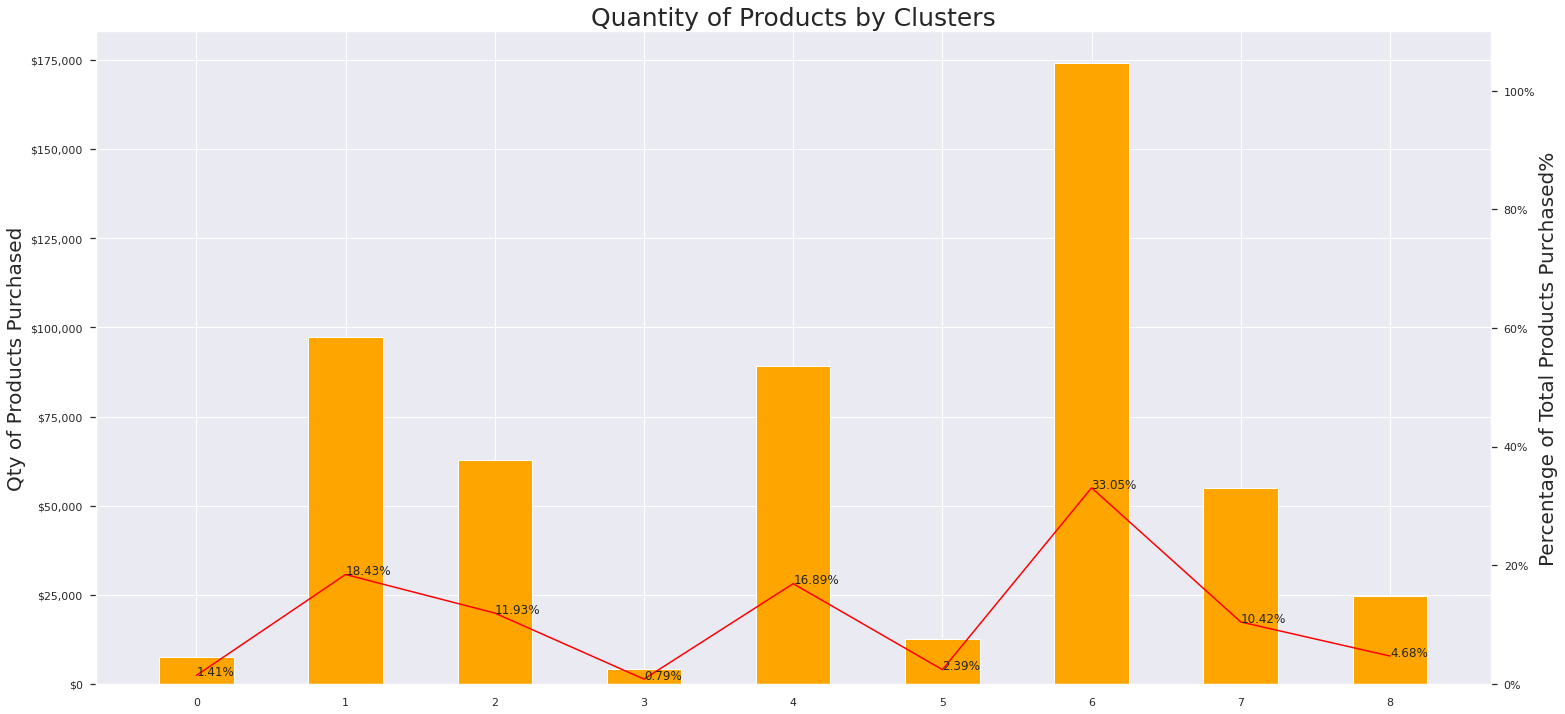

,cluster,qty_products,perc_%
0,0,"7,460.00",1.41
1,1,"97,204.00",18.43
2,2,"62,915.00",11.93
3,3,"4,157.00",0.79
4,4,"89,076.00",16.89
5,5,"12,598.00",2.39
6,6,"174,315.00",33.05
7,7,"54,982.00",10.42
8,8,"24,700.00",4.68


In [95]:
fig = plt.figure() # creating matplotlib figure

ax = fig.add_subplot() # creating matplotlib axes
ax2 = ax.twinx() # creating another axes that shares the same x-axis as ax.

ax.bar(total_products_by_cluster['cluster'], total_products_by_cluster['qty_products'], color='orange', width=0.5)
ax2.plot(total_products_by_cluster['cluster'], total_products_by_cluster['perc_%'], color='red')

for index, percentage in enumerate( round(total_products_by_cluster['perc_%'],2) ):
    ax2.text( index, np.around(percentage,2), str(percentage)+'%')

plt.xticks(total_products_by_cluster['cluster'])
ax.set_ylabel('Qty of Products Purchased', fontsize=20)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
                                                                                                                       
ax2.set_ylabel('Percentage of Total Products Purchased%',fontsize=20)
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}%'))
ax2.set_ylim([0,110])
ax2.grid(visible=False)

plt.title('Quantity of Products by Clusters', fontdict= {'fontsize': 25})
plt.show()
mpl.rcParams['font.size']=20
display(total_products_by_cluster[['cluster', 'qty_products', 'perc_%']].style.format({'qty_products': '{0:,.2f}', 'perc_%': '{:.2f}'}))

In [97]:
df_products_insiders = df10.loc[df10['cluster'] == 6, 'qty_products'].sum()
df_total_products = df10.loc[:, 'qty_products'].sum()

print('Total Qty Products by Insiders: {:.2f}%'.format(100*df_products_insiders/df_total_products))

Total Qty Products by Insiders: 33.05%


### Champions cluster customers have a purchase volume (turnover) above 10% of their total purchase income
**True** The Champions cluster has a billing volume of 53.86% of the total billing volume.

In [98]:
total_gmv_by_cluster = df10[['cluster', 'gross_revenue']].groupby('cluster').sum().reset_index()
total_gmv_by_cluster['percentage'] =  total_gmv_by_cluster['gross_revenue']/total_gmv_by_cluster['gross_revenue'].sum()
total_gmv_by_cluster.style.format({'gross_revenue': '${0:,.2f}', 'percentage': '{:.2%}'})

,cluster,gross_revenue,percentage
0,0,"$159,730.08",1.60%
1,1,"$1,411,501.67",14.13%
2,2,"$781,574.63",7.83%
3,3,"$37,308.02",0.37%
4,4,"$1,255,172.83",12.57%
5,5,"$156,420.45",1.57%
6,6,"$5,378,901.96",53.86%
7,7,"$565,338.35",5.66%
8,8,"$241,610.26",2.42%


In [100]:
df_gmv_insiders = df10.loc[df10['cluster'] == 6, 'gross_revenue'].sum()
df_total_gmv = df10.loc[:, 'gross_revenue'].sum()

print('Total GMV by Insiders: {:.2f}%'.format(100*df_gmv_insiders/df_total_gmv))

Total GMV by Insiders: 53.86%


### Champions customers have an average number of returns below the average of the total customers base
**False**: Champions customers has average bounces above the overall average. 808.36%

In [103]:
# media de devolução do cluster insider
# media de devolução do total

# avg_cluster_return = df10[['cluster', 'qty_returns']].groupby('cluster').mean().reset_index()
# avg_cluster_return

# mean of returns by insiders customers
df_avg_return_insiders = df10.loc[df10['cluster']==6, 'qty_returns'].mean()

# total returns mean
df_avg_return_total = df10['qty_returns'].mean()

print('Avg Return Champions: {} VS Avg Return All: {}'.format(df_avg_return_insiders, df_avg_return_total))

Avg Return Champions: 147.3861788617886 VS Avg Return All: 18.2325663095029


In [104]:
(147.3861788617886 * 100) / 18.2325663095029

808.367710611151

### Customer Hypothesis

1. 60% dos clientes do cluster insiders possuem o estado civil de solteiro
2. 10% dos clientes do cluster insiders estão na faixa de 24-35 anos.
3. 40% das localidades de entrega do cluster insiders estão dentro de um raio de 50 km.
4. 5% dos clientes do cluster insiders recebem mais de 100 mil dólares anualmente.
5. 90% dos clientes do cluster insiders tem ensino superior completo

### Product Hypothesis

1. 30% de todos os produtos em pacotes grandes são comprados pelos clientes do cluster insiders.
2. A mediana dos preços dos produtos comprados pelos clientes do cluster insider é 10% maior do que a mediana de todos os preços dos produtos
3. O percentil do preço dos produtos comprados pelos clientes insiders.
4. O peso médio dos produtos comprados pelos clientes do cluster insiders é maior do que o peso médio dos outros clusters.
5. A idade média dos produtos comprados pelos clientes do cluster insiders é menor do que 15 dias.

## Median Champions cluster customer gross revenue is 10% higher than median overall billing
**True**

In [108]:
# median de gmv do cluster Champions
df_median_gmv_champions = df10.loc[df10['cluster'] == 6, 'gross_revenue'].median()

# mediana de gmv do total
df_median_gmv_total = df10.loc[:, 'gross_revenue'].median()

gmv_diff = (df_median_gmv_champions - df_median_gmv_total)/ df_median_gmv_total

print('Median Diff: {:.2f}%'.format(100*gmv_diff))

Median Diff: 780.77%


In [107]:
# mean de gmv do cluster Champions
df_mean_gmv_champions = df10.loc[df10['cluster'] == 6, 'gross_revenue'].mean()

# mean de gmv do total
df_mean_gmv_total = df10.loc[:, 'gross_revenue'].mean()

gmv_diff = (df_mean_gmv_champions - df_mean_gmv_total)/ df_mean_gmv_total

print('Mean Diff: {:.2f}%'.format(100*gmv_diff))

Mean Diff: 523.18%


### The number of champions clients are concentrated in the 3rd quartile
**False** Cluester Champions revenue is concentrated in the first quartile 1

In [109]:
np.percentile(df10.loc[df10['cluster']==6, 'gross_revenue'], q = 0.1)

470.07003

In [110]:
np.percentile(df10.loc[df10['cluster']==6, 'gross_revenue'], q = 0.9)

1331.3585600000001

In [111]:
sns.boxplot( x = df_aux)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='gross_revenue'>

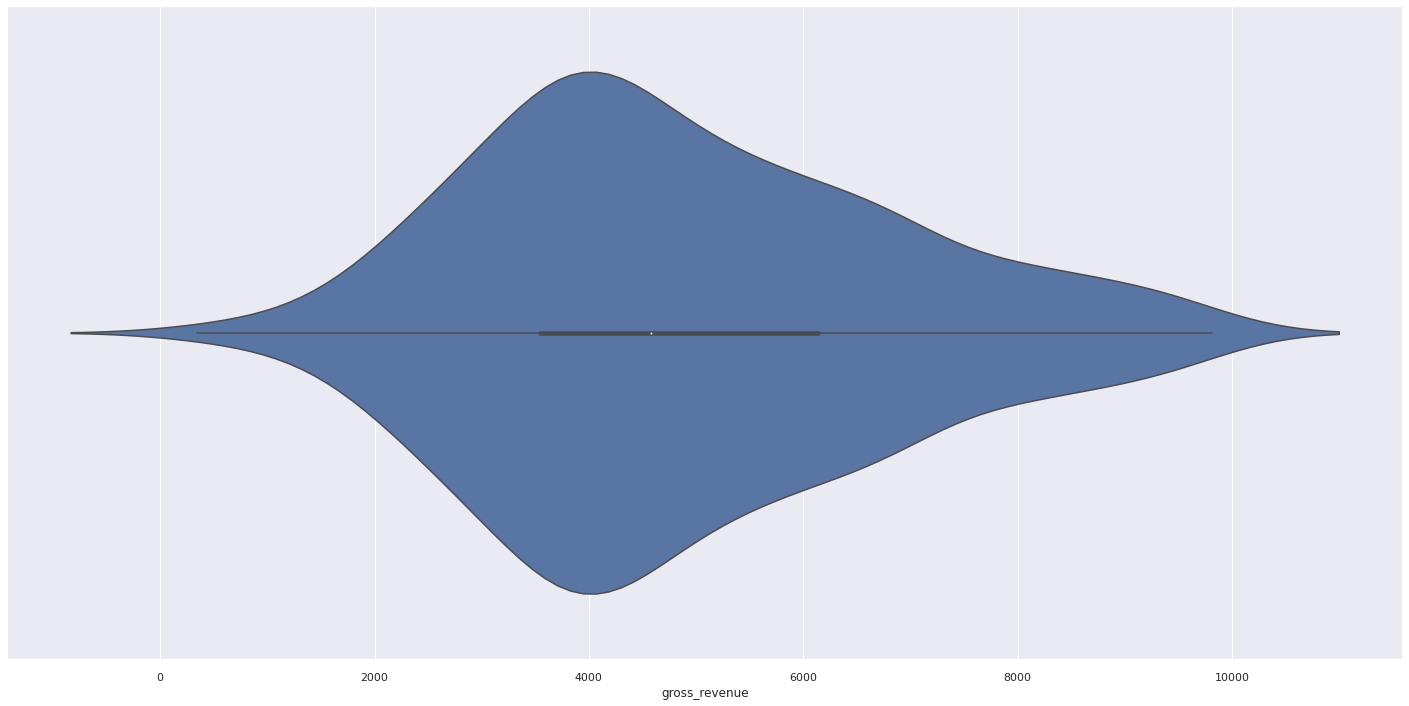

In [113]:
df_aux = df10.loc[(df10['cluster']==6) & (df10['gross_revenue']<10000) , 'gross_revenue']

sns.violinplot( x = df_aux)

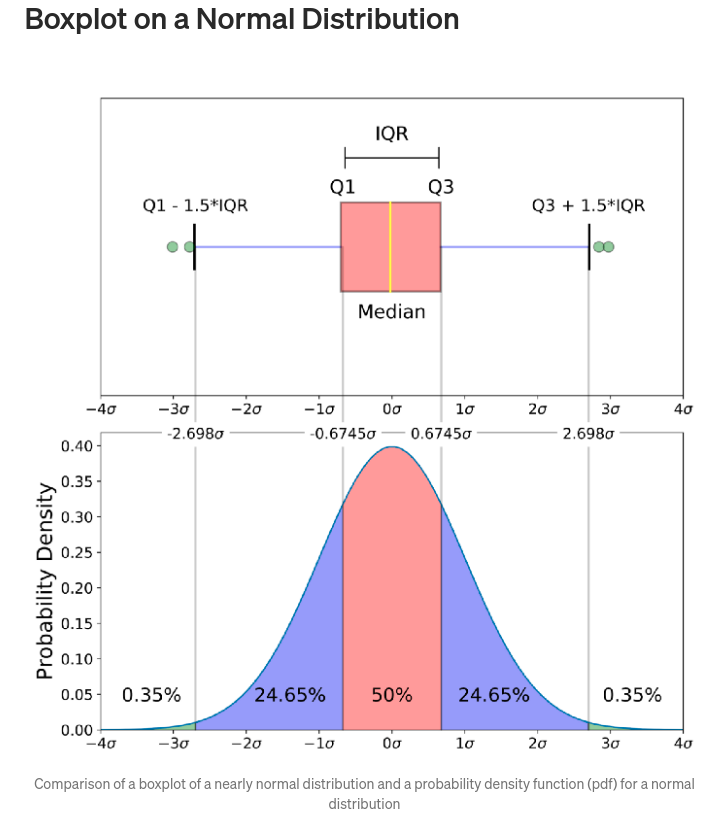

In [114]:
Image('/home/marxcerqueira/repos/Kaggle-Rossman-Sales-Prediction/img/boxplot-normal-distribuition.png')

## Business Questions

In [115]:
df10.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,frequency,qty_returns,cluster
0,17850,5391.21,372.0,34.0,1733.0,297.0,17.000000,40.0,4
1,13047,3232.59,56.0,9.0,1390.0,171.0,0.028302,35.0,4
2,12583,6705.38,2.0,15.0,5028.0,232.0,0.040323,50.0,6
3,13748,948.25,95.0,5.0,439.0,28.0,0.017921,0.0,2
4,15100,876.00,333.0,3.0,80.0,3.0,0.073171,22.0,0


### 1. Who are the eligible people to participate in the Champions program?

In [116]:
df_champions = df10.loc[df10['cluster'] == 6, 'customer_id']

### 2. How many customers will be part of the loyalty group?

In [117]:
df_champions.size

492

### 3.What are the main characteristics of these customers?

**High Value Customers Cluster(07):**

- Number of customers: 493 (9.67% of costumers)
- Avg Gross Revenue: $10923.08
- Avg Recency Average: 29 days
- Avq of Qty of invoice no: 15.82
- Avg of Qty of Items: 6420.2
- Avg of Qty Products Purchased: 354 un
- Purchase Frequency: 0.116 products per day

### 4.What is the percentage of revenue contribution that comes from the Champions?

In [118]:
total_gmv_by_cluster = df10[['cluster', 'gross_revenue']].groupby('cluster').sum().reset_index()
total_gmv_by_cluster['perc_%'] =  round(100*total_gmv_by_cluster['gross_revenue']/total_gmv_by_cluster['gross_revenue'].sum(), 2)
total_gmv_by_cluster.sort_values('gross_revenue', ascending = False)

,cluster,gross_revenue,perc_%
6,6,5378901.96,53.86
1,1,1411501.67,14.13
4,4,1255172.83,12.57
2,2,781574.63,7.83
7,7,565338.35,5.66
8,8,241610.26,2.42
0,0,159730.08,1.60
5,5,156420.45,1.57
3,3,37308.02,0.37


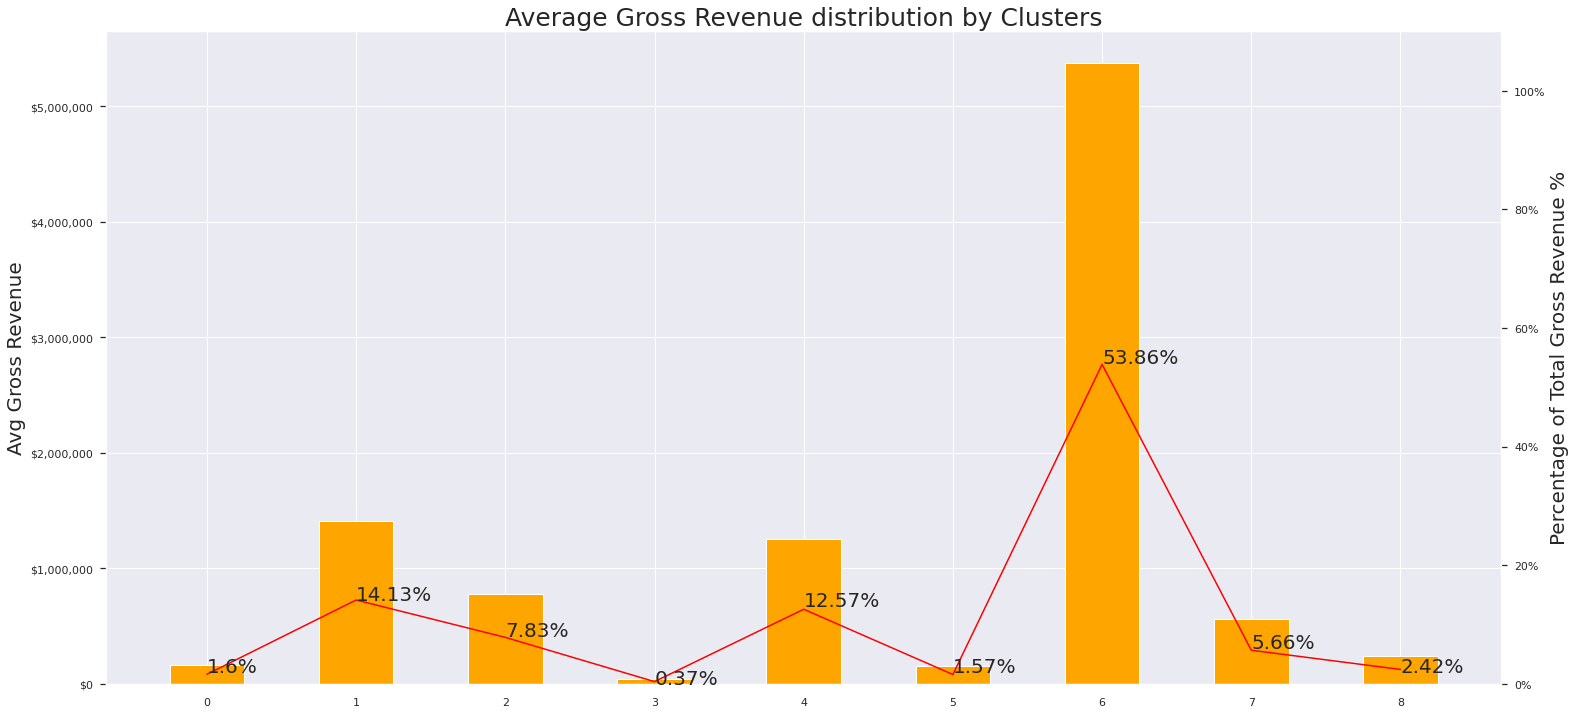

,cluster,gross_revenue,perc_%
0,0,"$159,730.08",1.60
1,1,"$1,411,501.67",14.13
2,2,"$781,574.63",7.83
3,3,"$37,308.02",0.37
4,4,"$1,255,172.83",12.57
5,5,"$156,420.45",1.57
6,6,"$5,378,901.96",53.86
7,7,"$565,338.35",5.66
8,8,"$241,610.26",2.42


In [119]:
fig = plt.figure() # creating matplotlib figure

ax = fig.add_subplot() # creating matplotlib axes
ax2 = ax.twinx() # creating another axes that shares the same x-axis as ax.

ax.bar(total_gmv_by_cluster['cluster'], total_gmv_by_cluster['gross_revenue'], color='orange', width=0.5)
ax2.plot(total_gmv_by_cluster['cluster'], total_gmv_by_cluster['perc_%'], color='red')

for index, percentage in enumerate( total_gmv_by_cluster['perc_%'] ):
    ax2.text( index, np.around(percentage), str(percentage)+'%')

plt.xticks(total_gmv_by_cluster['cluster'])
ax.set_ylabel('Avg Gross Revenue', fontsize=20)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
                                                                                                                       
ax2.set_ylabel('Percentage of Total Gross Revenue %',fontsize=20)
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}%'))
ax2.set_ylim([0,110])
ax2.grid(visible=False)



plt.title('Average Gross Revenue distribution by Clusters', fontdict= {'fontsize': 25})

plt.show()
mpl.rcParams['font.size']=20
display(total_gmv_by_cluster[['cluster', 'gross_revenue', 'perc_%']].style.format({'gross_revenue': '${0:,.2f}', 'perc_%': '{:.2f}'}))

### 6. What are the conditions for a person to be eligible for Champions?

The model will tell us who will be in the inside

### 7. What are the conditions for a person to be removed from Champions?

The model will tell us who will be in the inside

### 8.What are the guarantees that the Champions program is better than the rest of the base?

- A/B Test


### 9. What actions can the marketing team take to increase sales?

- Discounts
- Purchases preference
- Free shipping
- Special visit to the company

# MODEL DEPLOYMENT

In [120]:
df92.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,frequency,qty_returns,cluster
0,17850,5391.21,372.0,34.0,1733.0,297.0,17.000000,40.0,4
1,13047,3232.59,56.0,9.0,1390.0,171.0,0.028302,35.0,4
2,12583,6705.38,2.0,15.0,5028.0,232.0,0.040323,50.0,6
3,13748,948.25,95.0,5.0,439.0,28.0,0.017921,0.0,2
4,15100,876.00,333.0,3.0,80.0,3.0,0.073171,22.0,0


In [121]:
df92.dtypes

customer_id         int64
gross_revenue     float64
recency_days      float64
qty_invoice_no    float64
qty_items         float64
qty_products      float64
frequency         float64
qty_returns       float64
cluster             int64
dtype: object

## Local

In [ ]:
# # create database
# conn = sqlite3.connect('champions_db.sqlite')

# # create table
# query_create_champions = """
#     CREATE TABLE champions (
#         customer_id      INTEGER,
#         gross_revenue  REAL,
#         recency_days   INTEGER,
#         qty_invoice_no INTEGER,
#         qty_items      INTEGER,
#         qty_products   INTEGER,
#         frequency      INTEGER,
#         qty_returns    INTEGER,
#         cluster        INTEGER
#         )
# """

# conn.execute(query_create_champions)
# conn.commit()
# conn.close()

# # database connection
# conn = create_engine('sqlite:///champions_db.sqlite')

In [ ]:
# # # drop table
# # query_drop_champions = """
# #     DROP TABLE champions

# # """

# #create table
# query_create_champions = """
#     CREATE TABLE champions (
#         customer_id      INTEGER,
#         gross_revenue  REAL,
#         recency_days   INTEGER,
#         qty_invoice_no INTEGER,
#         qty_items      INTEGER,
#         qty_products   INTEGER,
#         frequency      INTEGER,
#         qty_returns    INTEGER,
#         cluster        INTEGER
#         )
# """

# conn.execute(query_create_champions)

In [ ]:
# # insert transformed data (cluster results) into database
# df92.to_sql('champions', con = conn, if_exists = 'append', index = False)

In [122]:
conn = sqlite3.connect('champions_db.sqlite')

In [123]:
# consulting database
# get query
query_collect = """
    SELECT * from champions
"""

df = pd.read_sql_query(query_collect, conn)
df.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,frequency,qty_returns,cluster
0,17850,5391.21,372,34,1733,297,17.000000,40,4
1,13047,3232.59,56,9,1390,171,0.028302,35,4
2,12583,6705.38,2,15,5028,232,0.040323,50,6
3,13748,948.25,95,5,439,28,0.017921,0,2
4,15100,876.00,333,3,80,3,0.073171,22,0


In [124]:
df.shape

(5693, 9)